# Understanding the Behaviour of the Data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

diabetes_df = pd.read_csv(r'dataset_37_diabetes.csv')
diabetes_df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


preg  plas  pres  skin  insu   mass  pedi  age            class
0     6   148    72    35     0 33.600 0.627   50  tested_positive
1     1    85    66    29     0 26.600 0.351   31  tested_negative
2     8   183    64     0     0 23.300 0.672   32  tested_positive
3     1    89    66    23    94 28.100 0.167   21  tested_negative
4     0   137    40    35   168 43.100 2.288   33  tested_positive

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
diabetes_df['class'] = pd.get_dummies(diabetes_df['class'], drop_first=True)
diabetes_df.head()

preg  plas  pres  skin  insu   mass  pedi  age  class
0     6   148    72    35     0 33.600 0.627   50      1
1     1    85    66    29     0 26.600 0.351   31      0
2     8   183    64     0     0 23.300 0.672   32      1
3     1    89    66    23    94 28.100 0.167   21      0
4     0   137    40    35   168 43.100 2.288   33      1

The explanation of our features;

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

0    500
1    268
Name: class, dtype: int64


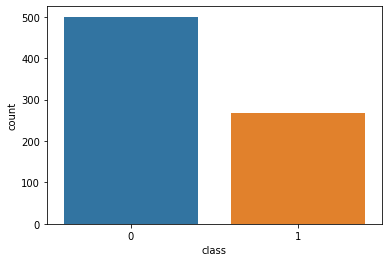

In [ ]:
sns.countplot(diabetes_df['class'])
print(diabetes_df['class'].value_counts())

Our target variable has a slight imbalancedness.

Since our target feature (class variable) is an object type, we have to do one-hot encoding before we get going.

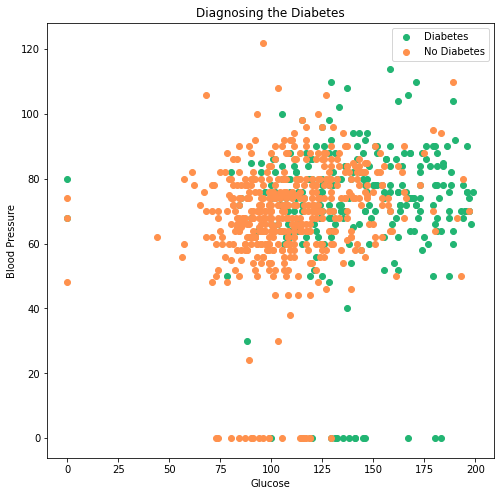

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(
    diabetes_df[diabetes_df['class'] == 1].plas,
    diabetes_df[diabetes_df['class'] == 1].pres,
    color='#22B573'
)
plt.scatter(
    diabetes_df[diabetes_df['class'] == 0].plas,
    diabetes_df[diabetes_df['class'] == 0].pres,
    color='#FF914D'
)
plt.legend(['Diabetes', 'No Diabetes'])
plt.title('Diagnosing the Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()

# Behaivour of the Features

In [ ]:
diabetes_df.describe()

preg    plas    pres    skin    insu    mass    pedi     age   class
count 768.000 768.000 768.000 768.000 768.000 768.000 768.000 768.000 768.000
mean    3.845 120.895  69.105  20.536  79.799  31.993   0.472  33.241   0.349
std     3.370  31.973  19.356  15.952 115.244   7.884   0.331  11.760   0.477
min     0.000   0.000   0.000   0.000   0.000   0.000   0.078  21.000   0.000
25%     1.000  99.000  62.000   0.000   0.000  27.300   0.244  24.000   0.000
50%     3.000 117.000  72.000  23.000  30.500  32.000   0.372  29.000   0.000
75%     6.000 140.250  80.000  32.000 127.250  36.600   0.626  41.000   1.000
max    17.000 199.000 122.000  99.000 846.000  67.100   2.420  81.000   1.000

To analyse feature-outcome distribution in visualisation;


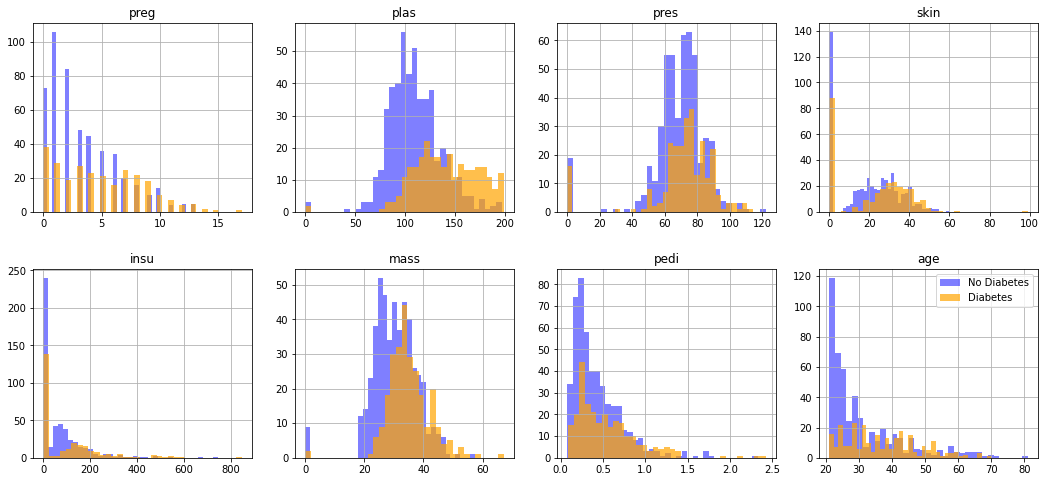

In [ ]:
features = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes_df[diabetes_df['class']==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes_df[diabetes_df['class']==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

Here we see that there are zero values in blood pressure, insulin, skin thickness, and body mass index (BMI).
Hence, we need to re-fill these zero values by median(we pick median so that 0's won't affect  the median value).

In [ ]:
diabetes_df.insu.replace(0, np.nan, inplace=True)
diabetes_df.insu.replace(np.nan, diabetes_df['insu'].median(), inplace=True)
diabetes_df.pres.replace(0, np.nan, inplace=True)
diabetes_df.pres.replace(np.nan, diabetes_df['pres'].median(), inplace=True)
diabetes_df.skin.replace(0, np.nan, inplace=True)
diabetes_df.skin.replace(np.nan, diabetes_df['skin'].median(), inplace=True)
diabetes_df.mass.replace(0, np.nan, inplace=True)
diabetes_df.mass.replace(np.nan, diabetes_df['mass'].median(), inplace=True)

#we first convert 0's to NaN's. Only then turning these values into the median of each feature.

Now we'll visualize the correlation again with these.

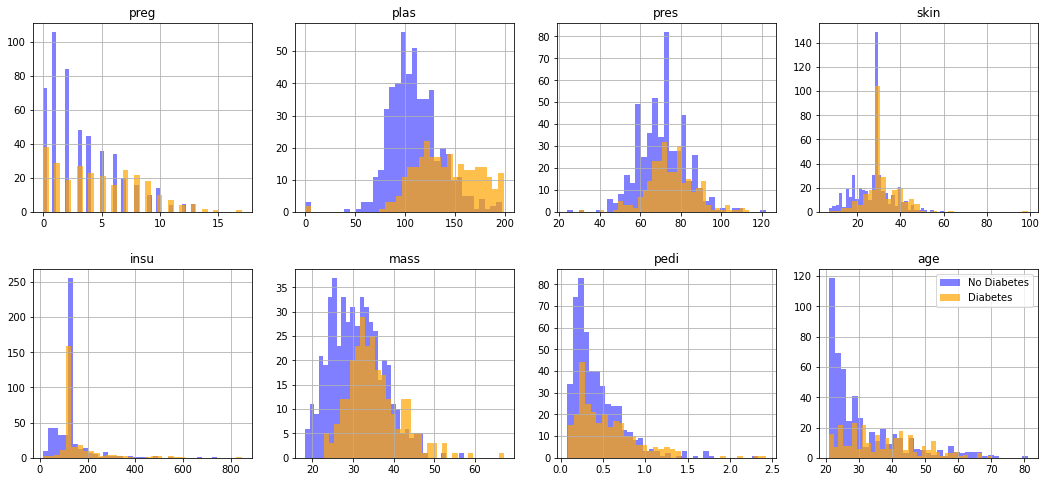

In [ ]:
features = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes_df[diabetes_df['class']==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes_df[diabetes_df['class']==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

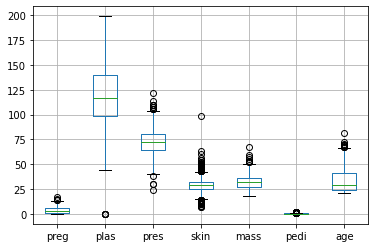

In [ ]:
boxplot = diabetes_df.boxplot(column=['preg', 'plas', 'pres', 'skin', 'mass', 'pedi', 'age'])
boxplot

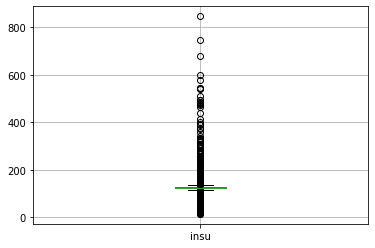

In [ ]:
# separated insu from other features since its values are higher than the others.
boxplot = diabetes_df.boxplot(column=['insu'])
boxplot

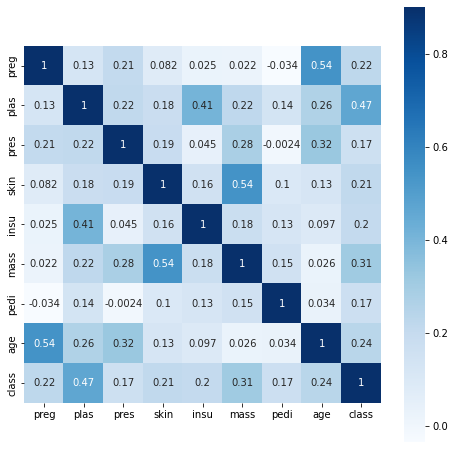

In [ ]:
corr = diabetes_df.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=True)

Plasma Glucose Tolerance seems to have the most correlation out there. However, this is not a scientific approach yet.

# Simple Logistic Regression

In [ ]:
# Creating the X and y variables for the applications
X, y = diabetes_df.drop('class', axis=1), diabetes_df['class']
print(X.shape, y.shape)

(768, 8) (768,)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='auto', solver= 'lbfgs')

Splitting the data first;

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify=y)

Fitting;

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('Auto-Selection of multi-classness', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Auto-Selection of multi-classness
------------------------------
Accuracy on Train Data : 0.78
Accuracy on Test Data  : 0.73


Accuracies with respect to different C values;

In [ ]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)

C_values  Train Accuracy  Test Accuracy
0     0.001           0.782          0.740
1     0.010           0.780          0.740
2     0.100           0.780          0.734
3     1.000           0.779          0.740
4    10.000           0.782          0.760
5   100.000           0.780          0.760
6  1000.000           0.783          0.760

This shows us that the best C value is 10.000. We can set this as C >= 10.000, also.

# Cross-Validation

Here we splitted our data into 8 equal pieces.

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=8, shuffle=True, random_state=1234)

In [ ]:
pieces = kf.split(X)

for num, (train_index, test_index) in enumerate(pieces):
    print("No.{} Train set size : {}".format(num+1,len(train_index)))
    print("No.{} Test set size     : {}".format(num+1,len(test_index)))
    print('-'*28, "\n")

No.1 Train set size : 672
No.1 Test set size     : 96
---------------------------- 

No.2 Train set size : 672
No.2 Test set size     : 96
---------------------------- 

No.3 Train set size : 672
No.3 Test set size     : 96
---------------------------- 

No.4 Train set size : 672
No.4 Test set size     : 96
---------------------------- 

No.5 Train set size : 672
No.5 Test set size     : 96
---------------------------- 

No.6 Train set size : 672
No.6 Test set size     : 96
---------------------------- 

No.7 Train set size : 672
No.7 Test set size     : 96
---------------------------- 

No.8 Train set size : 672
No.8 Test set size     : 96
---------------------------- 



In [ ]:
from sklearn.metrics import mean_squared_error

pieces = kf.split(X)
score_list = []

for i, (train_indeks, test_indeks) in enumerate(pieces):
    X_train, y_train = X.loc[train_indeks], y[train_indeks]
    X_test, y_test = X.loc[test_indeks], y[test_indeks]
    
    log_reg.fit(X_train, y_train)
    
    prediction = log_reg.predict(X_test)
    
    score = log_reg.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.3f}".format(i+1, score))
    print("-"*23, "\n")

Piece No.1 score: 0.812
----------------------- 

Piece No.2 score: 0.688
----------------------- 

Piece No.3 score: 0.781
----------------------- 

Piece No.4 score: 0.750
----------------------- 

Piece No.5 score: 0.729
----------------------- 

Piece No.6 score: 0.771
----------------------- 

Piece No.7 score: 0.792
----------------------- 

Piece No.8 score: 0.771
----------------------- 



8th splitting worked the best.

In [ ]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.76


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
cv = cross_validate(estimator=log_reg,
                    X=X,
                    y=y,
                    cv=8,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.77678571 0.77380952 0.77529762 0.78422619 0.77380952 0.76636905
 0.77678571 0.76190476]
--------------------------------------------------
Test Scores     :
[0.73958333 0.8125     0.76041667 0.77083333 0.80208333 0.75
 0.8125     0.77083333]


Some splits seems over-fitting and some splits are under-fitting. Fortunately, the difference of the scores are not that high for each splitting. We'll see it below.

In [ ]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.7736235119047619
Mean score of test set  :  0.77734375


It seems that 11-fold cross validated splitting for a Logistic Regression model works fine.
However, as being curious readers, we'll dig deep into the other models.

# Confusion Matrix on Logistic Regression

In [ ]:
train_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)

test_prediction_probability = log_reg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [ ]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[378  56]
 [115 123]]


Confusion Matrix (Test Data)
------------------------------
[[57  9]
 [13 17]]


In [ ]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 57
True positive amount  : 17
False positive amount : 9
False negative amount : 13


# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  log_reg.score(X_test, y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

Accuracy value by the model   :  0.7708333333333334
Calculated accuracy value     :  0.7708333333333334
accuracy_score() value        :  0.7708333333333334


# Precision

In [ ]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

Calculated precision value   :  0.6538461538461539
precision_score() value      :  0.6538461538461539


#Recall

In [ ]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

Calculated recall value   :  0.5666666666666667
recall_score() value      :  0.5666666666666667


#Specificity

In [ ]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.8636363636363636


#F1-Score

In [ ]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.6071428571428571
f1_score() value     :  0.6071428571428571


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        66
           1       0.65      0.57      0.61        30

    accuracy                           0.77        96
   macro avg       0.73      0.72      0.72        96
weighted avg       0.76      0.77      0.77        96

f1_score() value        : 0.61
recall_score() value    : 0.57
precision_score() value : 0.65


Precision  : [0.81428571 0.65384615]
Recall     : [0.86363636 0.56666667]
F1 Score   : [0.83823529 0.60714286]


**These results shows that our model predicts better the ones who are not diagnosed with diabetes.**

# ROC/AUC

In [ ]:
test_prediction_proba = log_reg.predict_proba(X_test)[:,1]

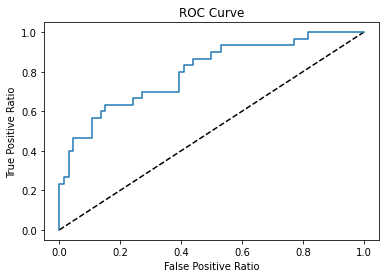

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [ ]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))


AUC value :  0.7999999999999999


Our graph and AUC values are good here.

# Precision Curve

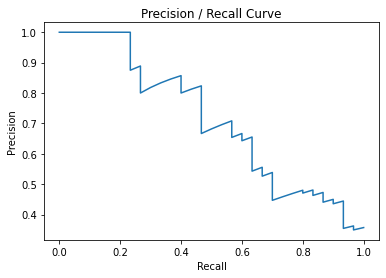

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

For some time, we had a pretty good estimations, but in the middle of the model, it seems that something terrible has happened.

#Log-Loss

In [ ]:
from sklearn.metrics import log_loss

print("Logarithmic Loss (log-loss) : " , log_loss(y_test, test_prediction_proba))
print("Error Rate                  : " , 1- accuracy_score(y_test, test_prediction))

Logarithmic Loss (log-loss) :  0.48859375476974737
Error Rate                  :  0.22916666666666663


Our log-loss value is pretty high.

# HyperParameter Tuning

In [ ]:
log_reg = LogisticRegression()

print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

# Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 1000, 'penalty': 'l2'}
Best Score      :  0.7773069036226932


Here we see that our best C value is 1000, best penalty to choose is 'l2', and our best score is ~0.77

In [ ]:
results = grid_cv.cv_results_

df = pd.DataFrame(results)
display(df.head().iloc[:,:6])
df.info()

mean_fit_time  std_fit_time  ...  param_C  param_penalty
0          0.001         0.001  ...    0.000             l1
1          0.014         0.001  ...    0.000             l2
2          0.001         0.000  ...    0.000             l1
3          0.026         0.003  ...    0.000             l2
4          0.001         0.000  ...    0.001             l1

[5 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [ ]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

param_penalty param_C  mean_test_score
17            l2    1000            0.777
19            l2   10000            0.772
13            l2      10            0.768
11            l2       1            0.767
15            l2     100            0.766
9             l2   0.100            0.764
3             l2   0.000            0.760
5             l2   0.001            0.759
7             l2   0.010            0.759
1             l2   0.000            0.744
0             l1   0.000              nan
2             l1   0.000              nan
4             l1   0.001              nan
6             l1   0.010              nan
8             l1   0.100              nan
10            l1       1              nan
12            l1      10              nan
14            l1     100              nan
16            l1    1000              nan
18            l1   10000              nan

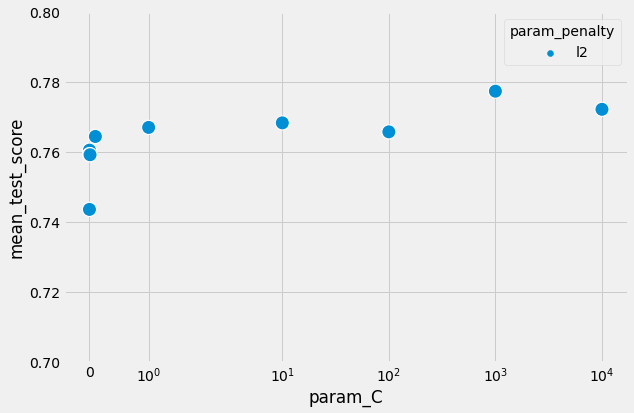

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=200)
plt.xscale('symlog')
plt.ylim((0.7,0.8))

plt.show()

# Random Search

In [ ]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [ ]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 1000} 

All precision values :  [0.72870927 0.70810943 0.72374709 0.71883658        nan 0.73986921
        nan        nan        nan        nan] 

Best precision value :  0.7398692135477032


In [ ]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs

param_penalty param_C  mean_test_score
5            l2    1000            0.740
0            l2   0.000            0.729
2            l2      10            0.724
3            l2       1            0.719
1            l2   0.001            0.708
4            l1     100              nan
6            l1   0.010              nan
7            l1   0.001              nan
8            l1    1000              nan
9            l1   0.000              nan

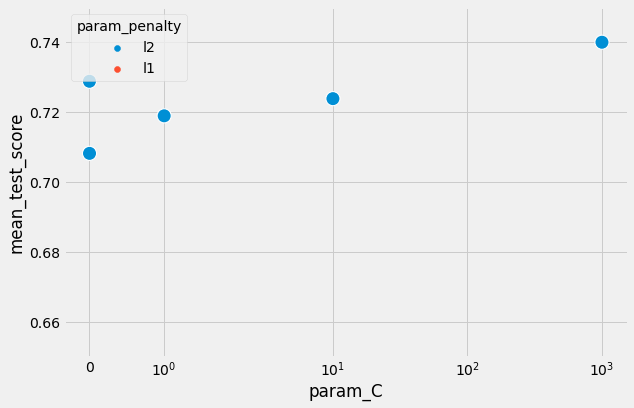

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.65, 0.75))

plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3)
X = diabetes_df[['plas', 'pres']]
Y = diabetes_df['class']
neighbors.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

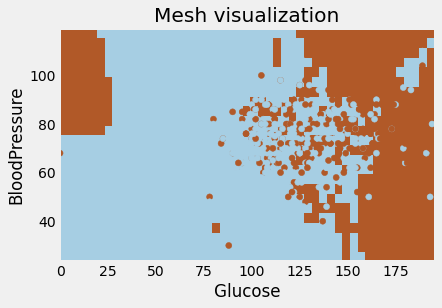

In [ ]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cvscores_3 = cross_val_score(neighbors, X_test, y_test, cv=3)
print('cv =  3 ---> Average cross validation score : ', np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(neighbors, X_test, y_test, cv=10)
print('cv = 10 ---> Average cross validation score  : ', np.mean(cvscores_10))

cv =  3 ---> Average cross validation score :  0.7604166666666666
cv = 10 ---> Average cross validation score  :  0.7822222222222222


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,
    random_state = 1337
)

X=diabetes_df.drop('class',axis=1)
Y=diabetes_df['class']

decision_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1337)

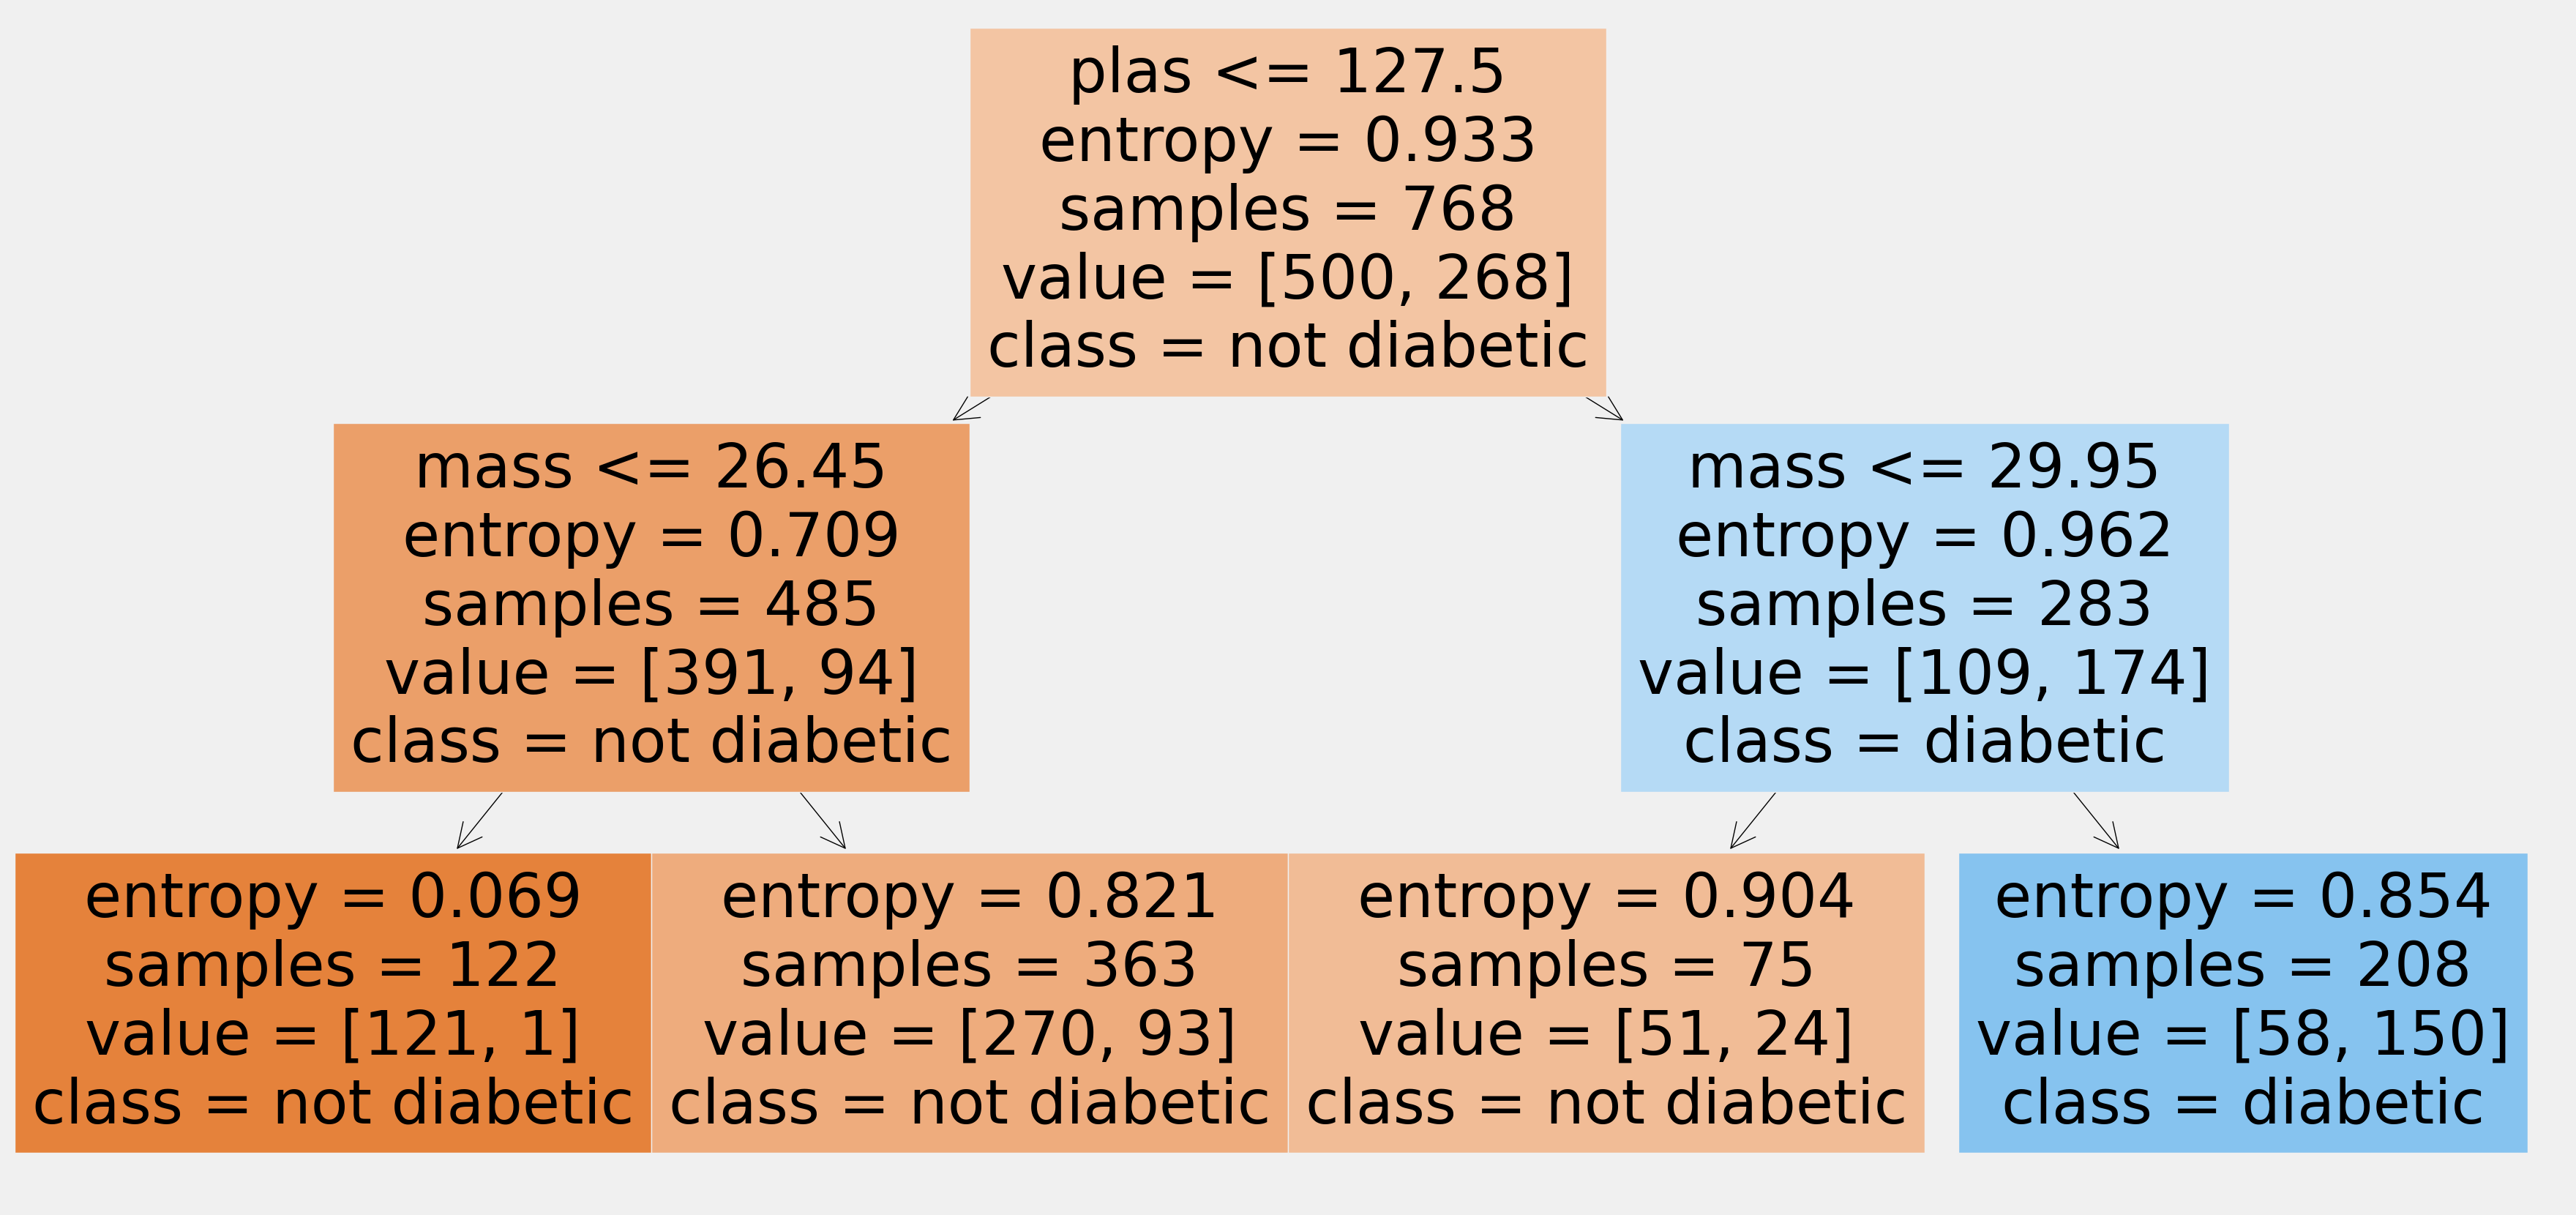

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(decision_tree = decision_tree,
          feature_names=X.columns,
          class_names=['not diabetic', 'diabetic'],
          filled = True
         )
plt.show()

**Comparing Decision Tree with Logistic Regression**

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.125, random_state=111)

In [ ]:
compare_decision_tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=2,random_state = 100)
compare_decision_tree.fit(X_train, y_train)

compare_log_reg = LogisticRegression()
compare_log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y_predict_dt = compare_decision_tree.predict(X_test)
y_predict_lr = compare_log_reg.predict(X_test)

print("Decision Tree Accuracy        : {:.4f}".format(accuracy_score(y_test, y_predict_dt)))
print("Logistic Regression Accuracy : {:.4f}".format(accuracy_score(y_test, y_predict_lr)))

Decision Tree Accuracy        : 0.7188
Logistic Regression Accuracy : 0.7292


Hence, Logistic Regression is superior than Decision Tree.

# Random Forest

Observe that we always split our data into the same amount of pieces before we get going.

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.125, random_state=111)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = random_forest.predict(X_test)
print("Accuracy of the Random Forest : {:.4f}".format(accuracy_score(y_test, y_predict)))

Accuracy of the Random Forest : 0.6979


Random Forest performed poorer than the previous models.

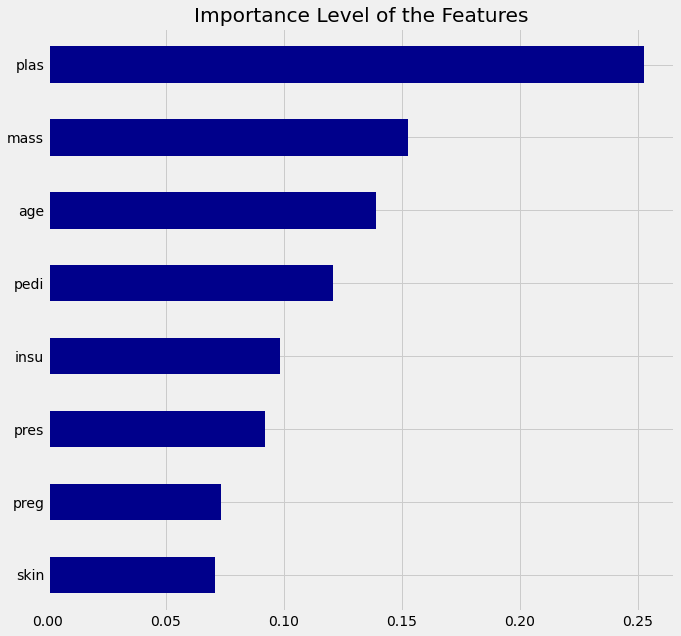

In [ ]:
plt.figure(figsize=(10,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

# SVM

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.125, random_state=111)

In [ ]:
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(X_train,y_train)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(smote_train, smote_target)

SVC(C=1, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred= svc.predict(X_test)
print("Accuracy Rate of SVC: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Rate of SVC: 0.71


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', C=10000)
svc.fit(smote_train, smote_target)

SVC(C=10000, kernel='sigmoid')

In [ ]:
y_pred= svc.predict(X_test)
print("Accuracy Rate of SVC: {:.2f}".format(accuracy_score(y_test, y_pred)))

Accuracy Rate of SVC: 0.36


Its not that bad for SVM. However, we have our best model as Logistic Regression still.

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
X, y = diabetes_df.drop('class', axis=1), diabetes_df['class']

In [ ]:
diabetes_df_dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
params = {"objective":"reg:logistic", "max_depth":3}


In [ ]:
diabetes_cv = xgb.cv(dtrain=diabetes_df_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)
display(diabetes_cv)

train-error-mean  train-error-std  test-error-mean  test-error-std
0             0.220            0.004            0.257           0.020
1             0.199            0.016            0.243           0.013
2             0.195            0.010            0.246           0.011
3             0.188            0.009            0.240           0.016
4             0.184            0.006            0.232           0.024

In [ ]:
print('Accuracy Value: {:.3f}'.format((1-diabetes_cv["test-error-mean"]).max()))

Accuracy Value: 0.768


Accuracy value of XGBoost seems the best.

In [ ]:
diabetes_auc = xgb.cv(dtrain=diabetes_df_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="auc", as_pandas=True, seed=123)
display(diabetes_auc)
print('AUC Score : {:.3f}'.format(diabetes_auc["test-auc-mean"].max()))

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0           0.837          0.016          0.773         0.039
1           0.863          0.011          0.794         0.040
2           0.883          0.009          0.811         0.039
3           0.890          0.012          0.812         0.042
4           0.898          0.009          0.822         0.039

AUC Score : 0.822


However, AUC score of XGBoost is lesser than Logistic Regression's.

**Regularization with XGBoost**

In [ ]:
l1_params = np.arange(0.01, 0.2, 0.01)
params = {"objective":"reg:squarederror","max_depth":3}
rmses_l1 = []
for alpha in l1_params:
    params["alpha"] = alpha
    cv_rmse = xgb.cv(dtrain=diabetes_df_dmatrix, params=params, nfold=4, num_boost_round=100, 
                             metrics="rmse", as_pandas=True, early_stopping_rounds=10, seed=123)
    rmses_l1.append(cv_rmse["test-rmse-mean"].tail(1).values[0])

In [ ]:
print("Best 11 values:")
best_values = pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"])
display(best_values.sort_values('rmse').head())

Best 11 values:


l1  rmse
0 0.010 0.395
2 0.030 0.399
1 0.020 0.399
4 0.050 0.399
3 0.040 0.399

Our model performs best when alpha = 0.5. One can check the other parameters as well.

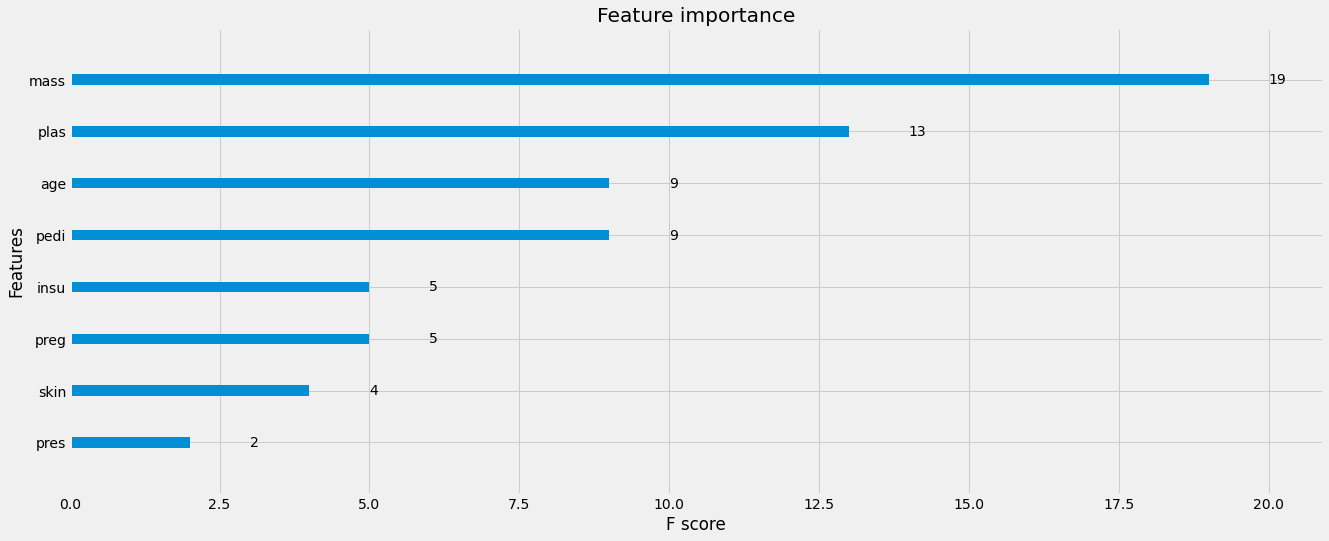

In [ ]:
best_parametes = {'objective':'reg:squarederror',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3
                      }

diabetes_model = xgb.train(params=best_parametes, dtrain=diabetes_df_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(diabetes_model)
ax.figure.set_size_inches(20,8)
plt.show()

Here, our most important features are mass (BMI), and plas(Glucose) levels.

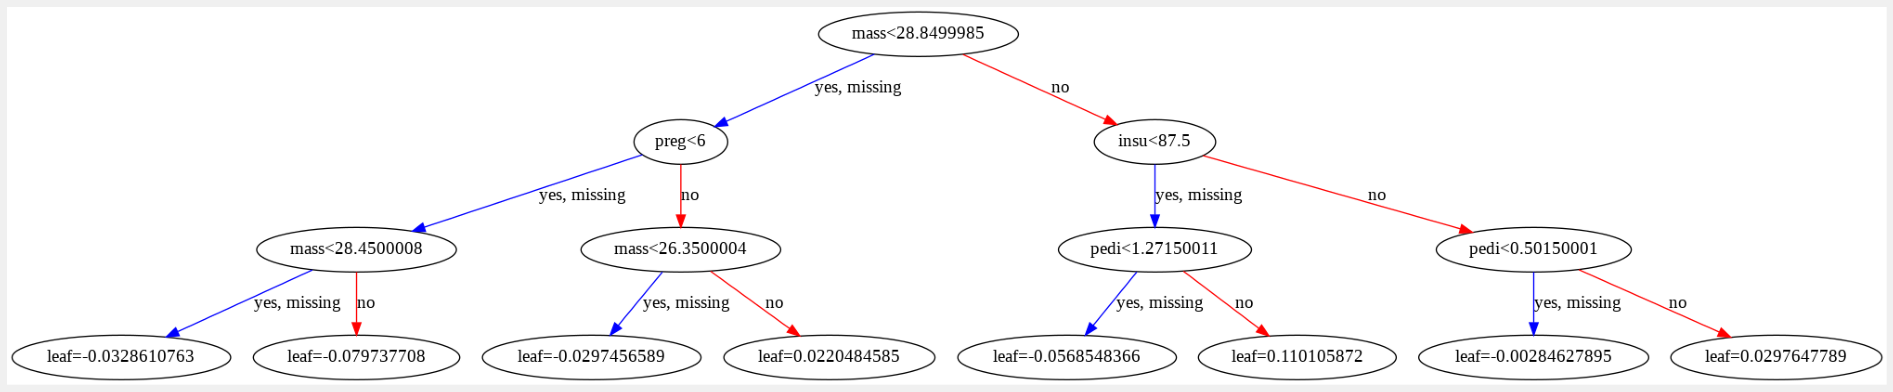

In [ ]:
ax1 = xgb.plot_tree(diabetes_model, num_trees=5)
ax1.figure.set_size_inches(30,30)
plt.show()

# LightGBM

In [ ]:
import lightgbm as lgb


In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.125, random_state=111)

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)


In [ ]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10,
          'verbose': -1,
          'force_row_wise':True,
         }

In [ ]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100)


In [ ]:
y_predict=lgb_model.predict(X_test)
y_predict[:15]

array([0.04550899, 0.0064257 , 0.09707898, 0.11151462, 0.00873101,
       0.6904734 , 0.69281031, 0.00610814, 0.06268697, 0.86943709,
       0.27720668, 0.24352625, 0.82397337, 0.18693685, 0.34944321])

In [ ]:
y_predict = [0 if y_predict < 0.5 else 1 for y_predict in y_predict]
y_predict[:15]

[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_predict,y_test)
accuracy

0.625

Our model performance had a slight decrease now with LightGBM.

# K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

10 loops, best of 5: 36.5 ms per loop


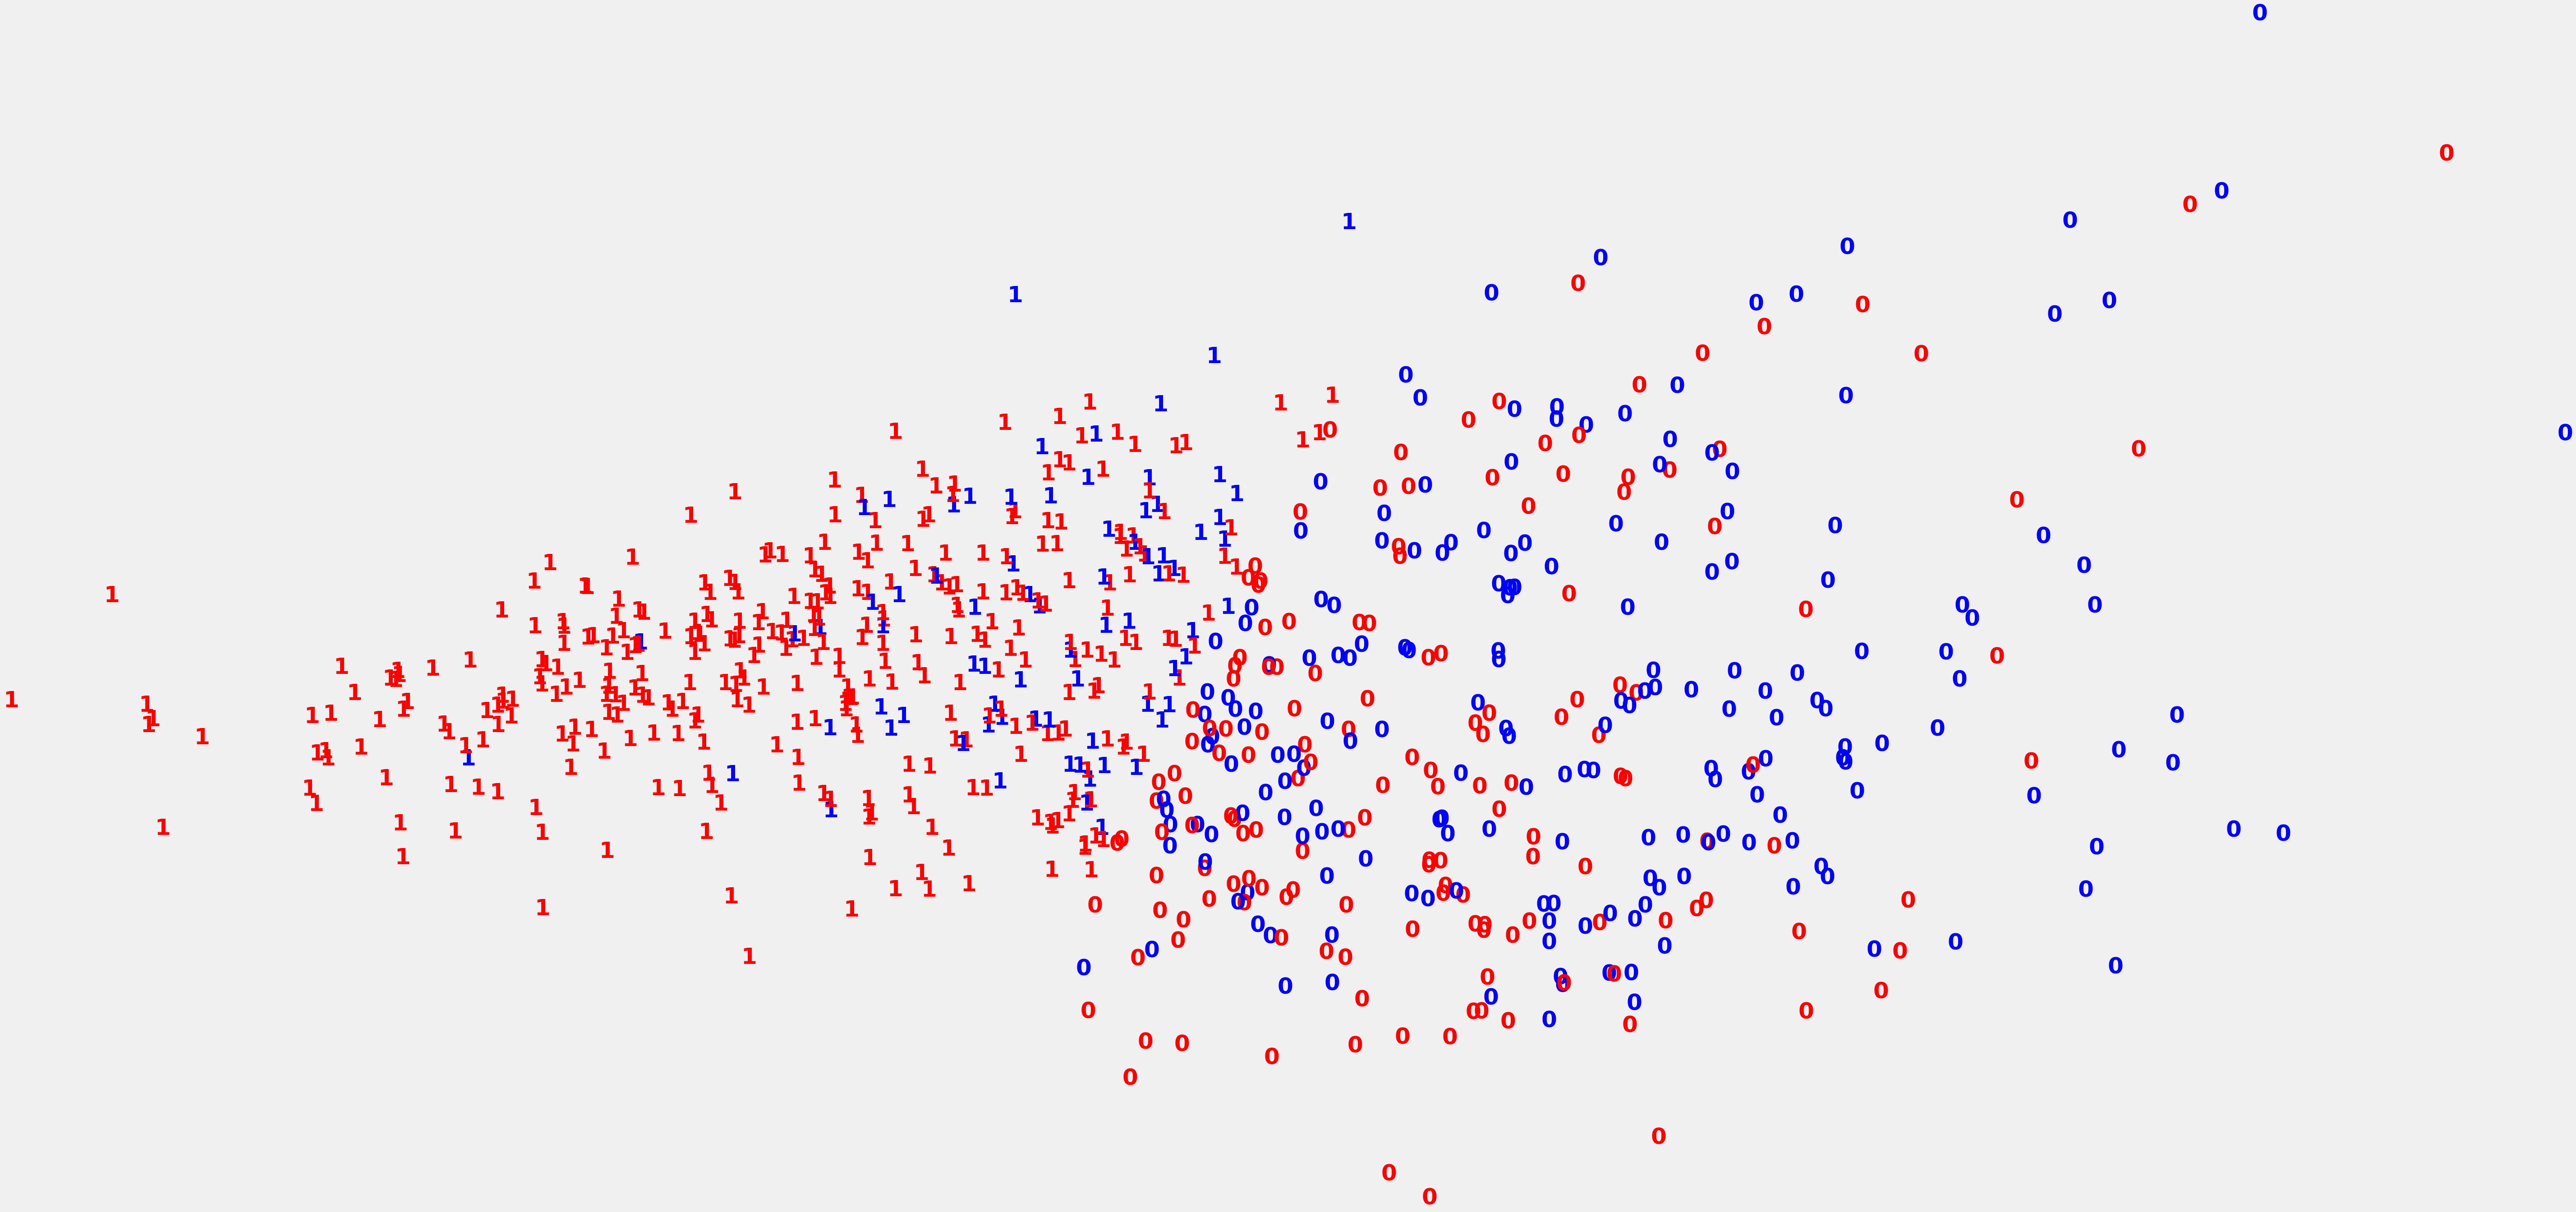

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems that K-Means does not perform very well for our data.

#Mini-Batch K-Means

The slowest run took 4.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 6.34 ms per loop


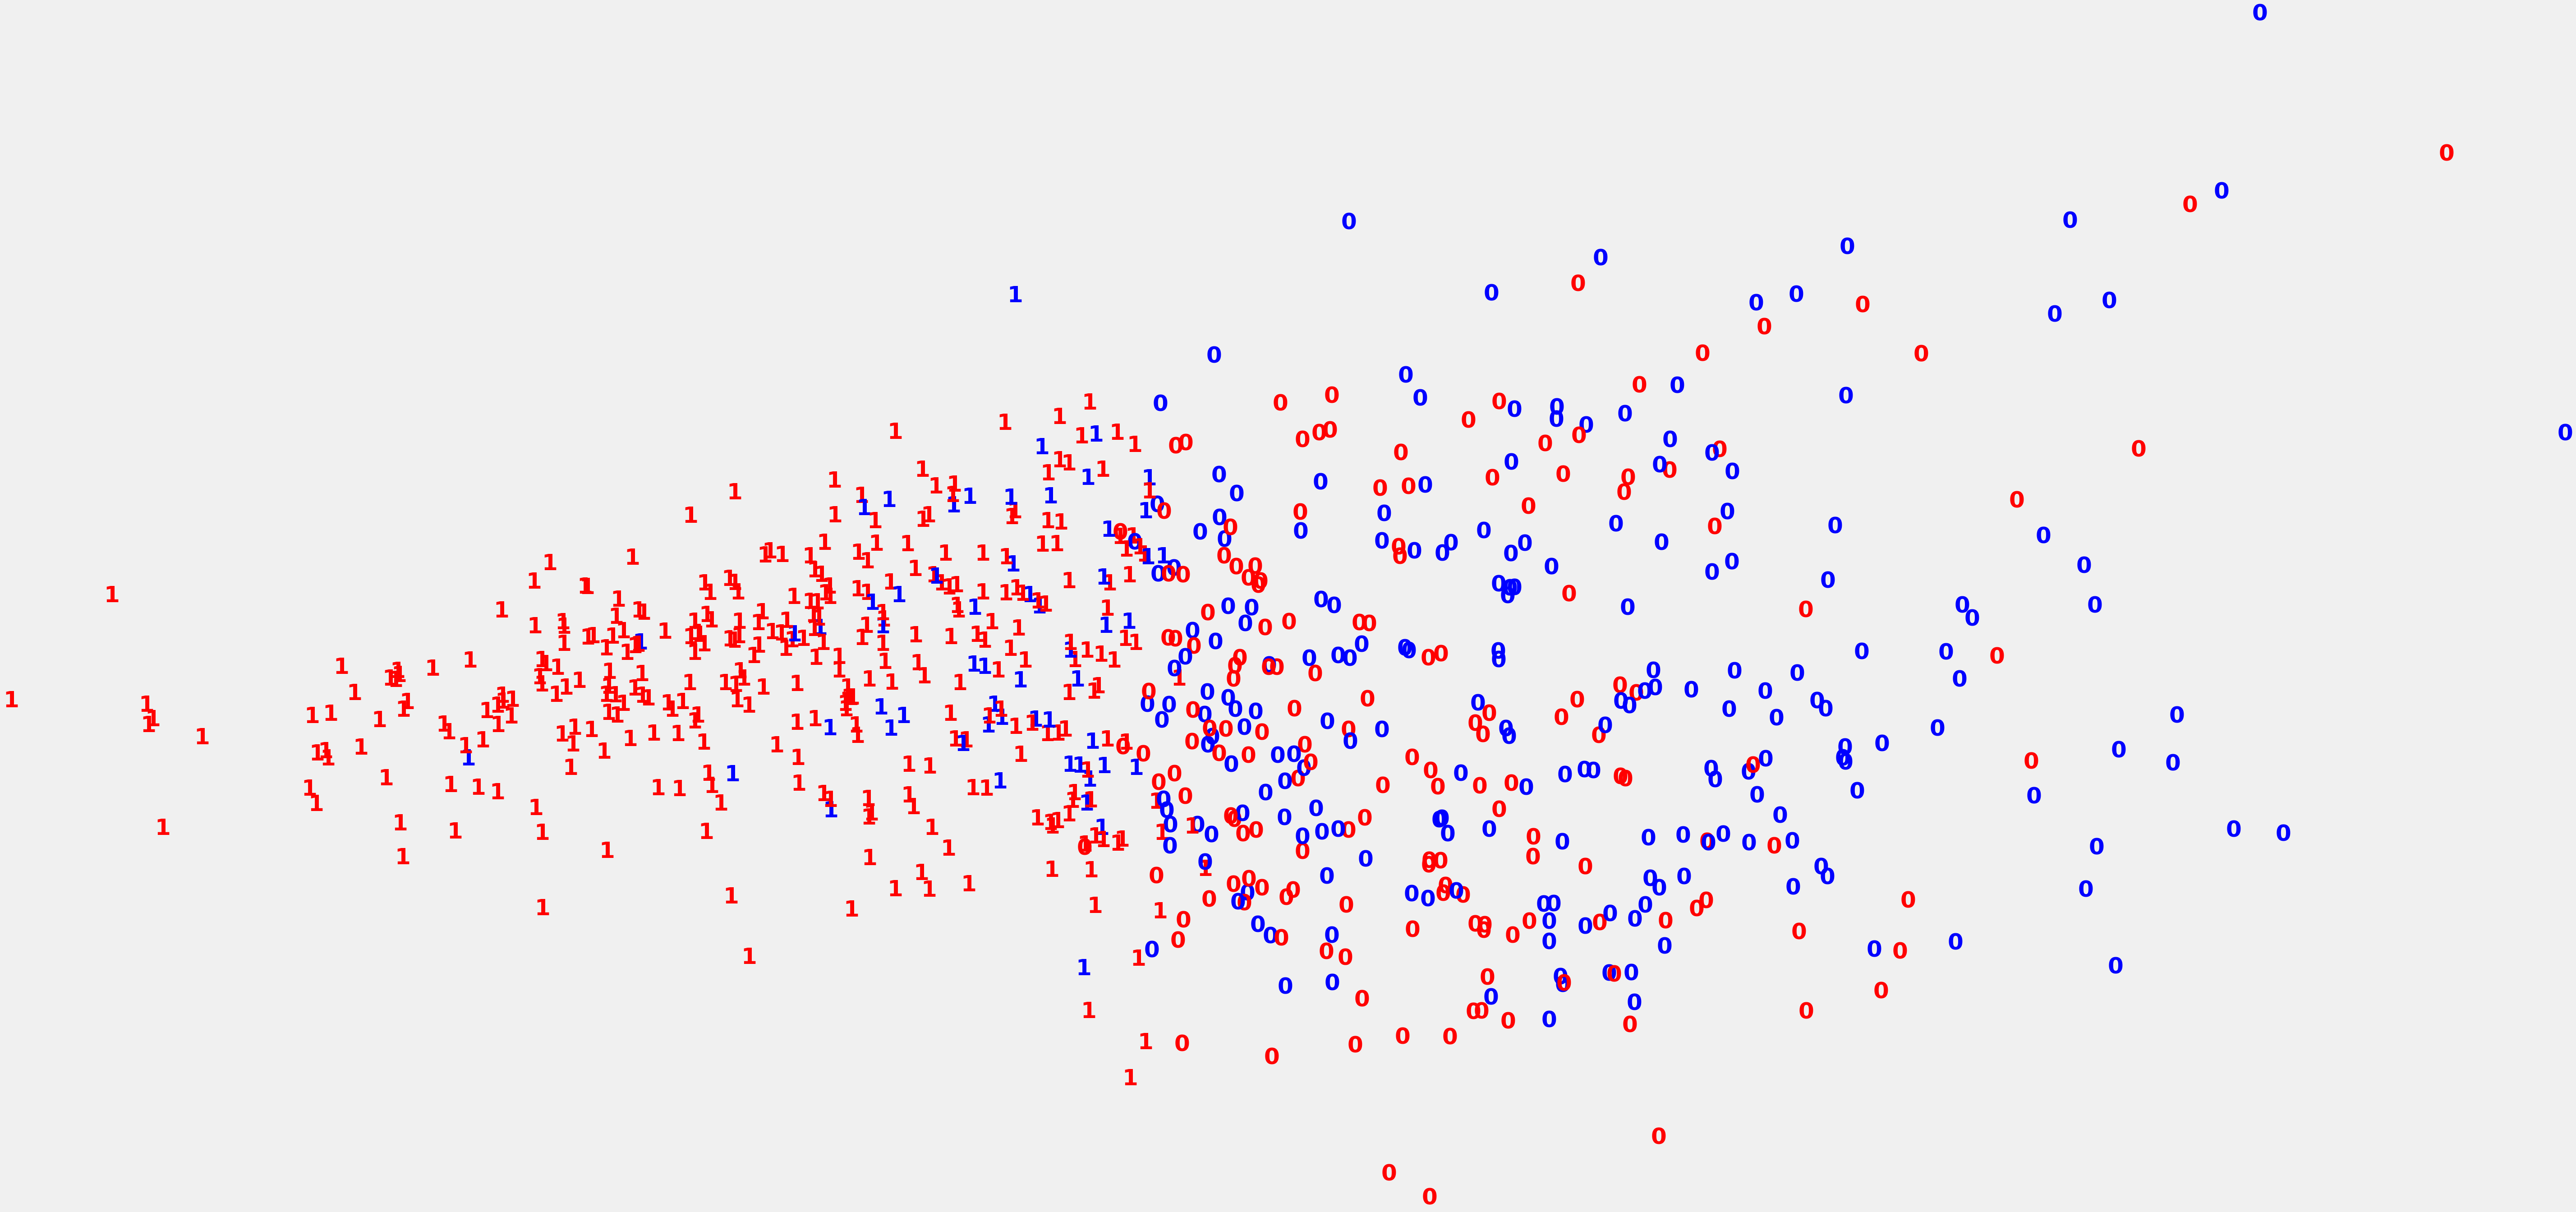

In [ ]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Mini-batch K means resulted not so different from previous model but it took shorter to get the result, with a 1/6 ratio.

** Now we'll try to increase the performance of K-Means Clustering **

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [ ]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

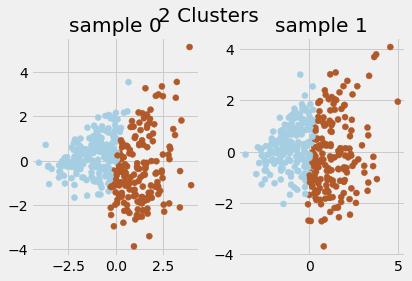

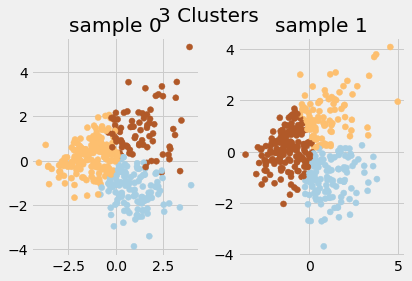

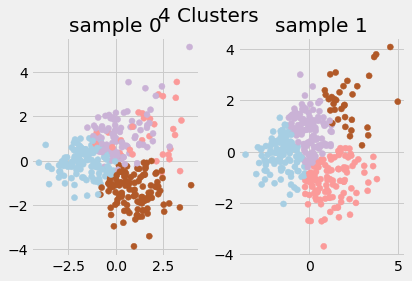

In [ ]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

Recall that we've used PCA by 2 principal components here. Also, it is good to know that our target variable has only 2 values. That's why 2-clusters work best.

In [ ]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0    0    1
class          
0      158  342
1      193   75

We have to rename the classes.

In [ ]:
full_pred = np.array([0 if x == 1 else 1 if x==0 else 2 for x in full_pred])

pd.crosstab(y, full_pred) 

col_0    0    1
class          
0      342  158
1       75  193

In [ ]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
import scipy
rand_index_score(y, full_pred)

0.5347742829204694

Our Rand-index score is not satisfactory, here.

In [ ]:
from sklearn import metrics
    
metrics.adjusted_rand_score(y, full_pred)

0.1530623499128565

Adjusted RI score tells us that this solution works randomly, let us check the silhouette score.

In [ ]:
model = KMeans(n_clusters=2, random_state=123).fit(X_std)
labels = model.labels_
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.19474492785996408


It is not that good, unfortunately.

#Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering


In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit(X_std)

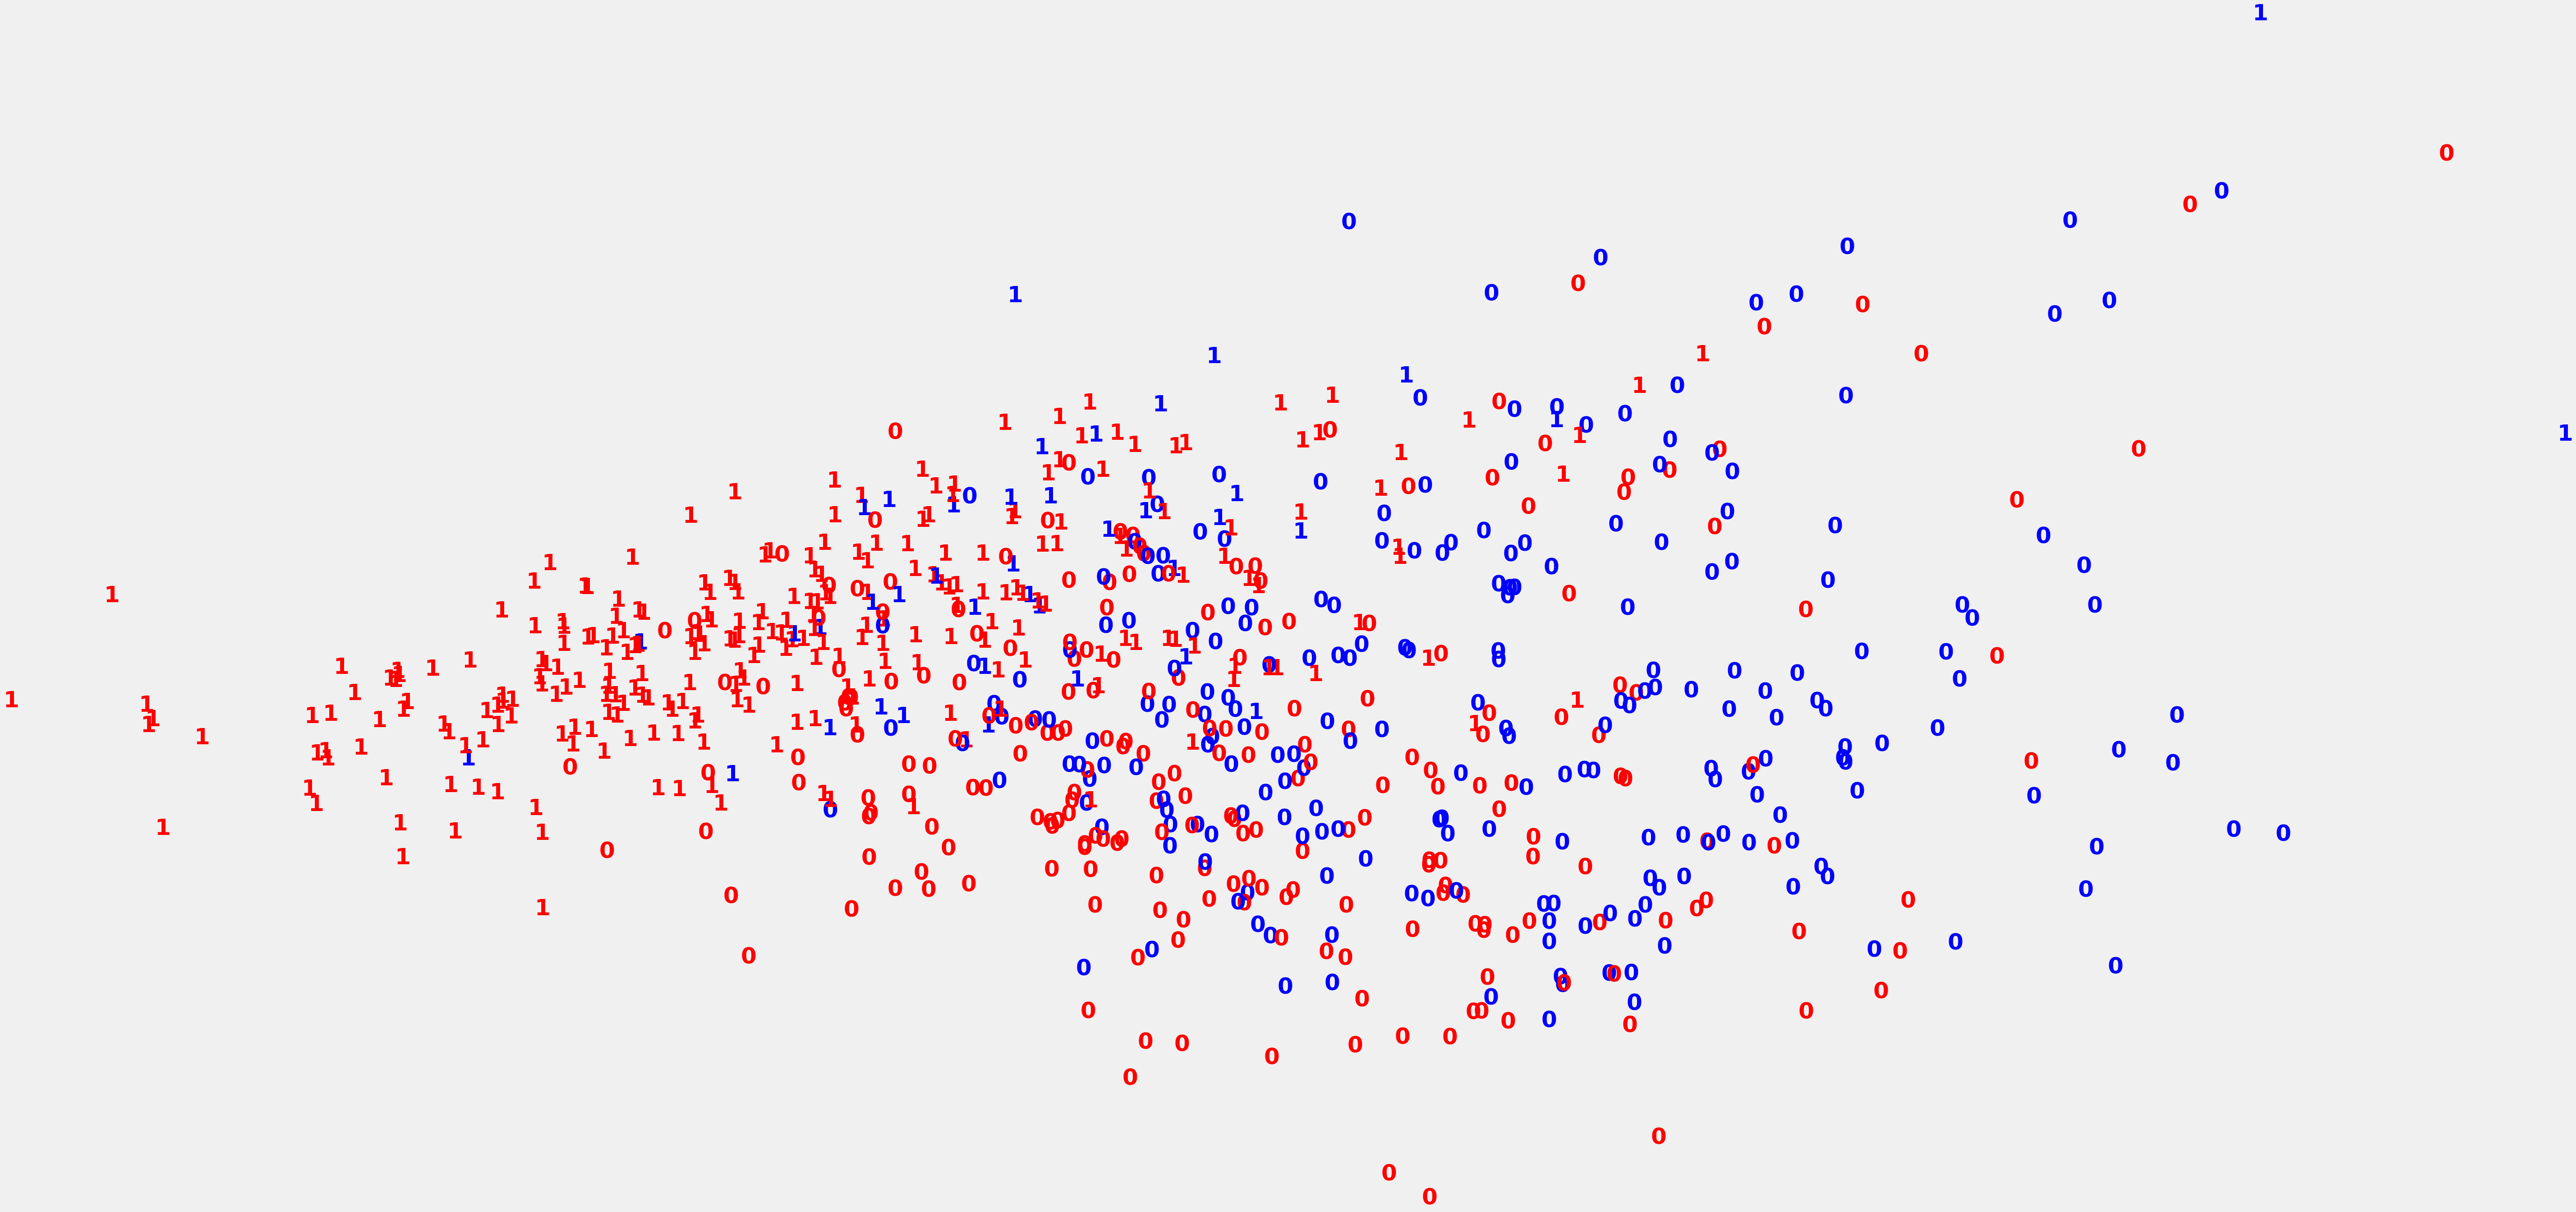

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

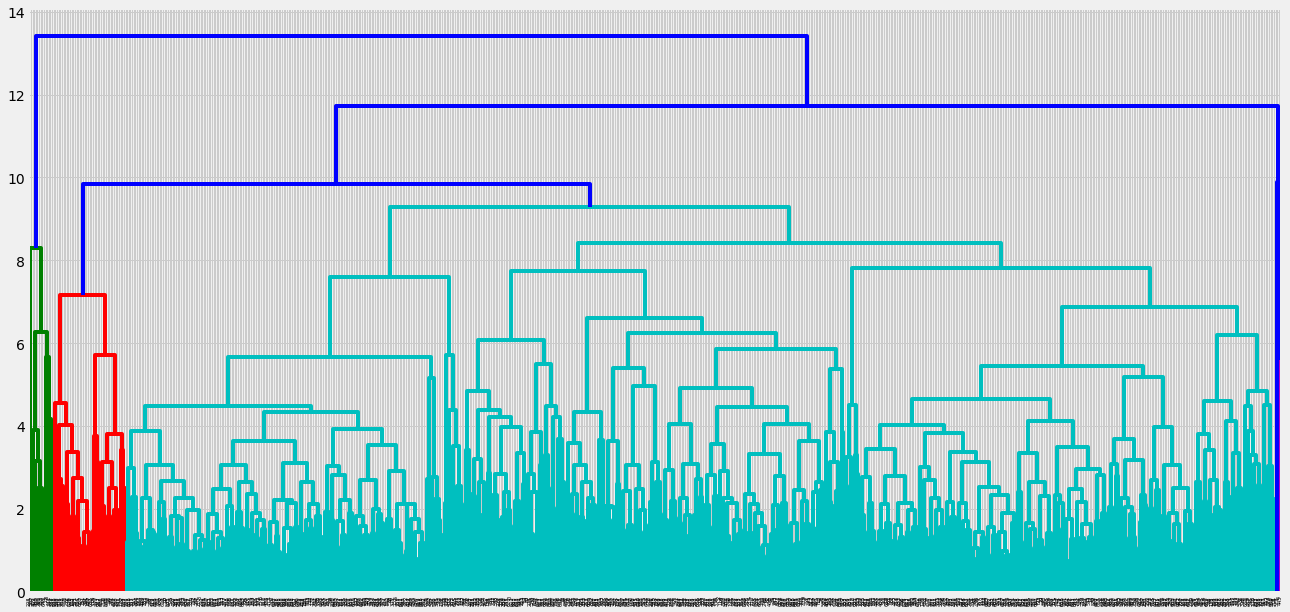

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=10)

# Fit model
clusters = dbscan_cluster.fit(X_std)

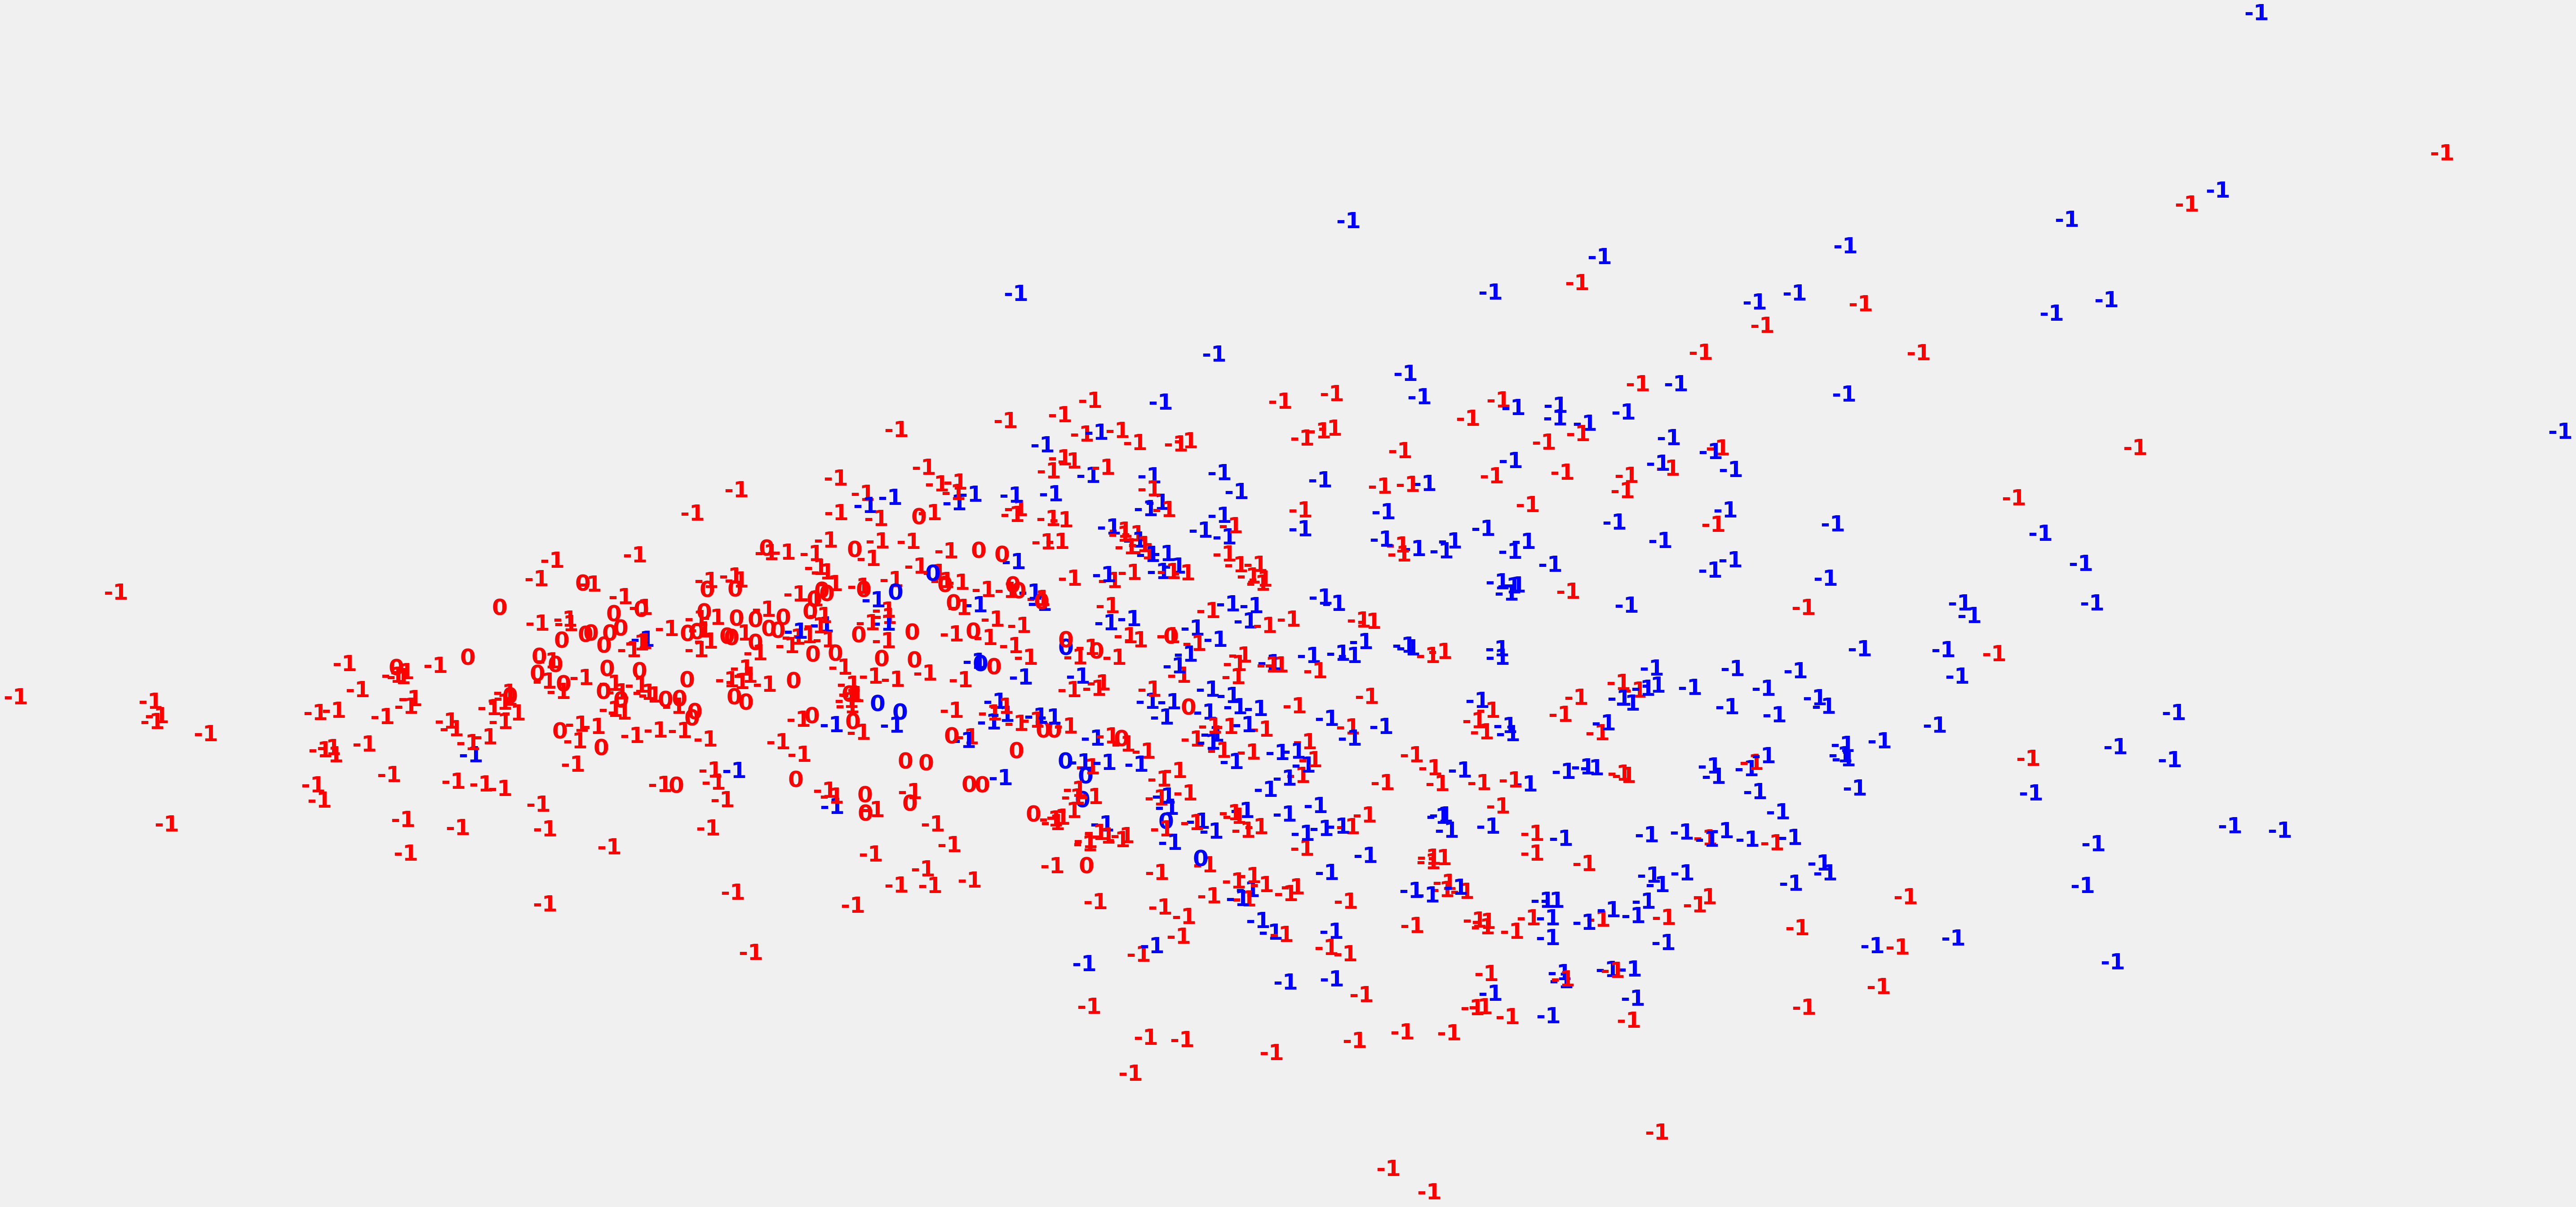

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rb'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The results got better, at least for the ones labeled as -1.

#GMM

In [ ]:
from sklearn import mixture
from matplotlib.patches import Ellipse


In [ ]:
# Coders might have to check this imports and modeling codes.

In [ ]:
# Defining the agglomerative clustering
gmm_cluster = mixture.GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit(X_std).predict(X_std)

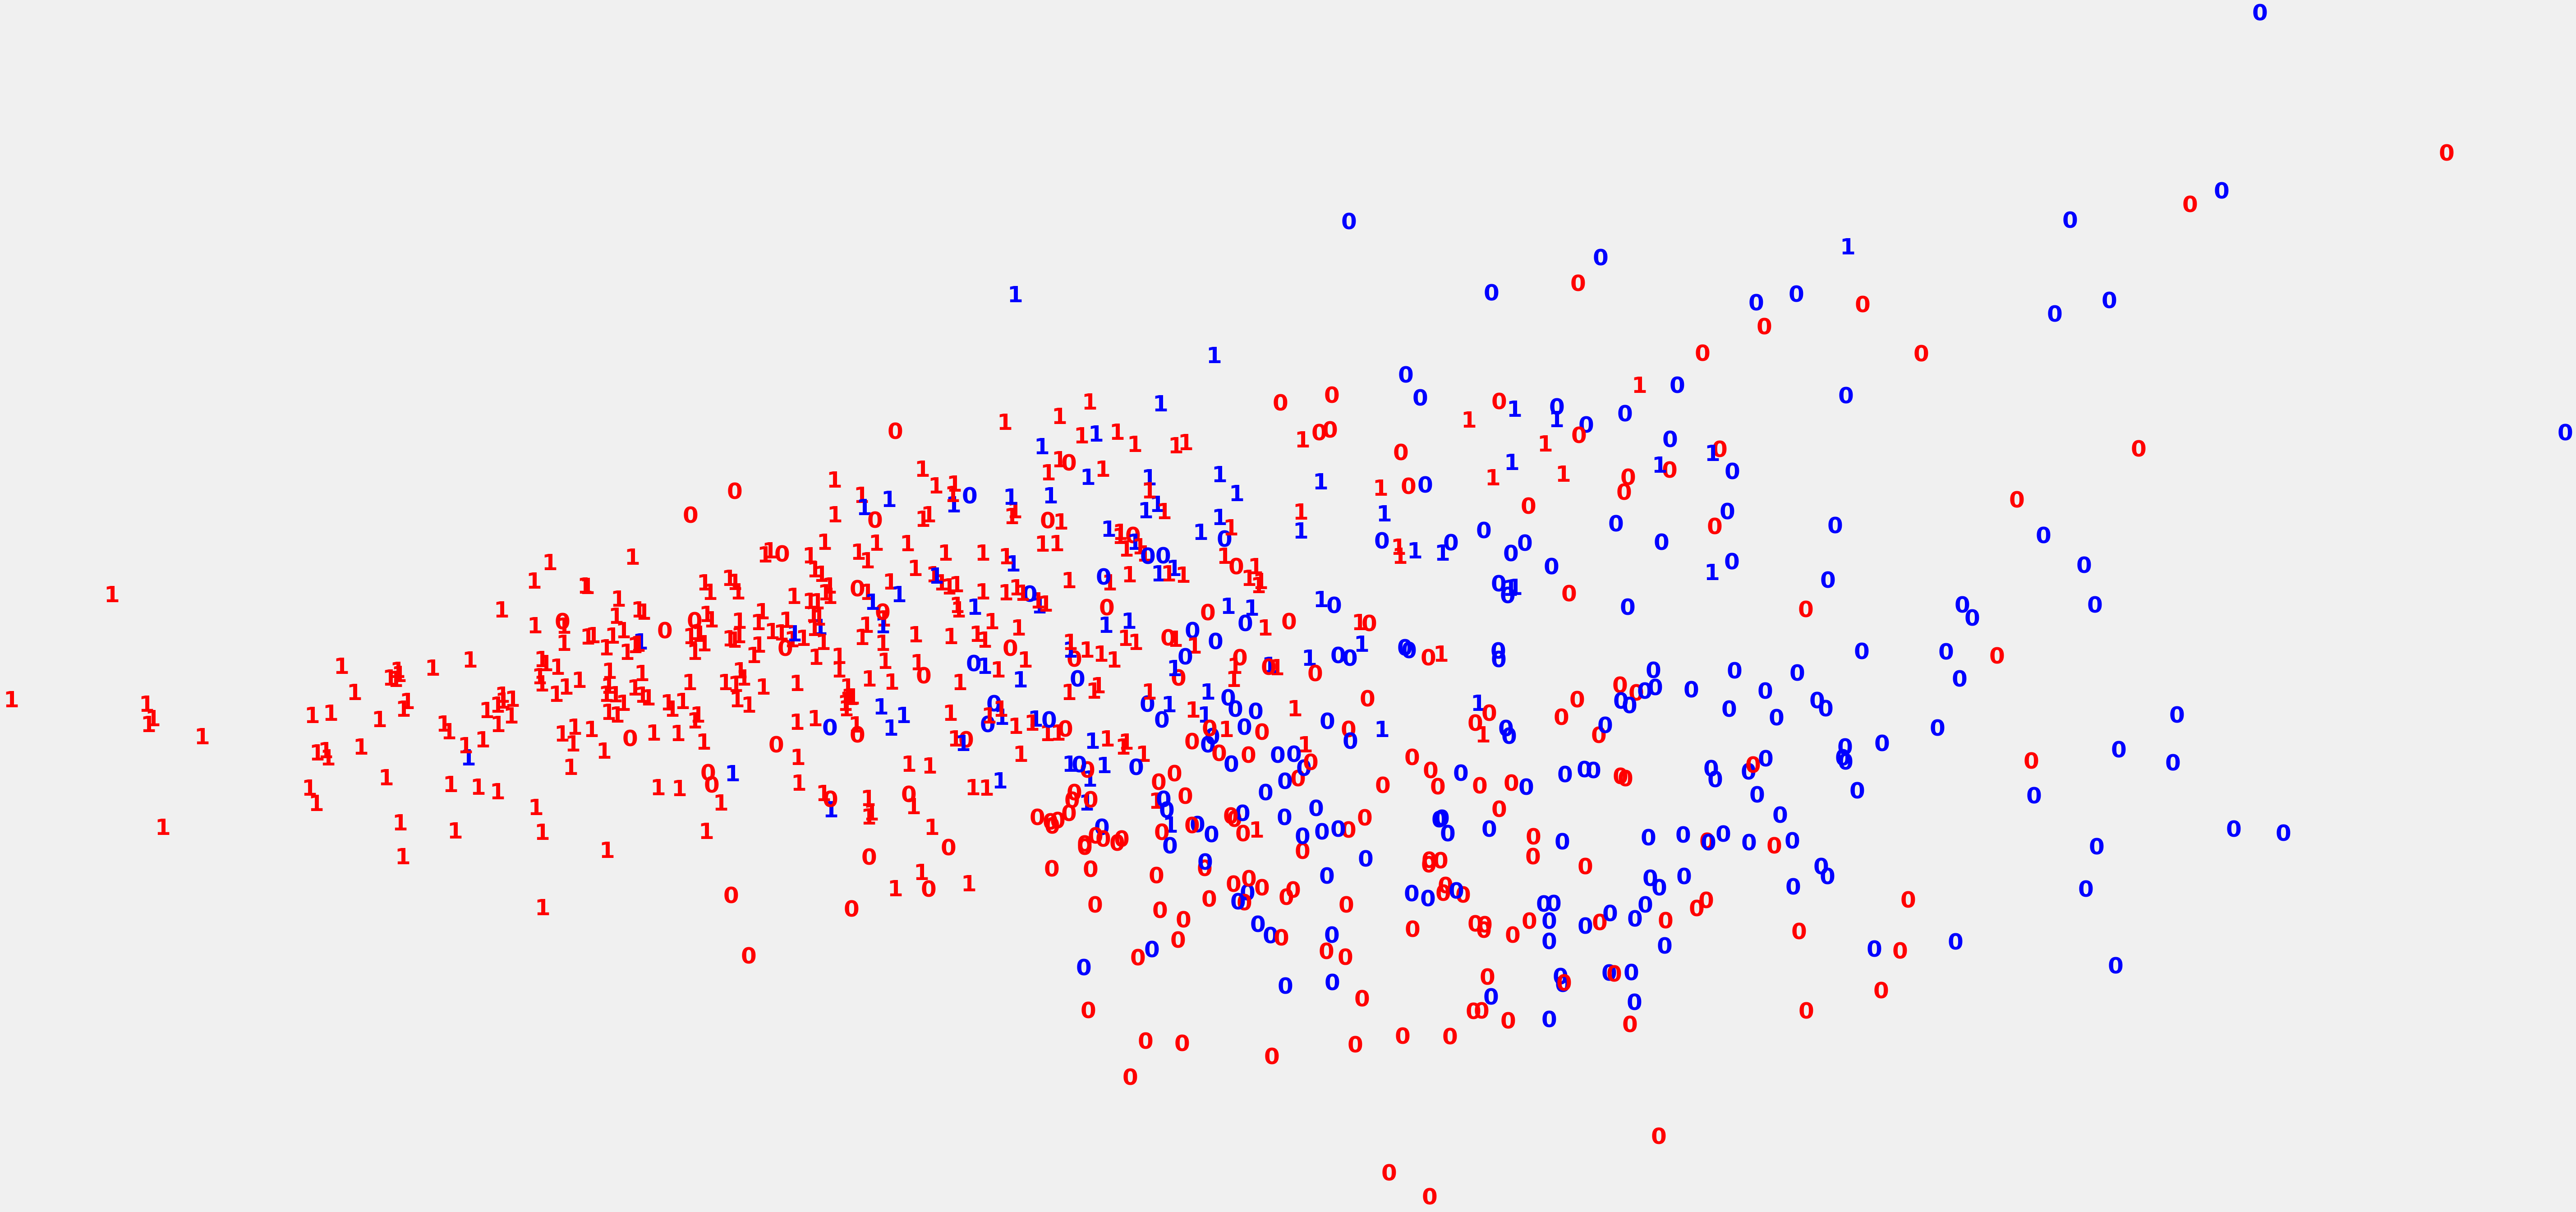

In [ ]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

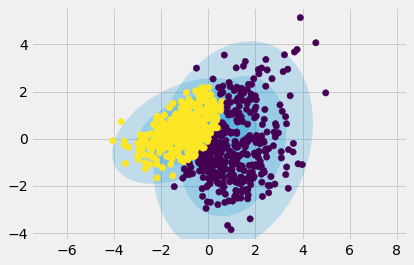

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        
plot_gmm(gmm_cluster, pca)

Next, we draw the same graph above this time by resizing the points according to the highest probability assigned to them by the winning cluster.



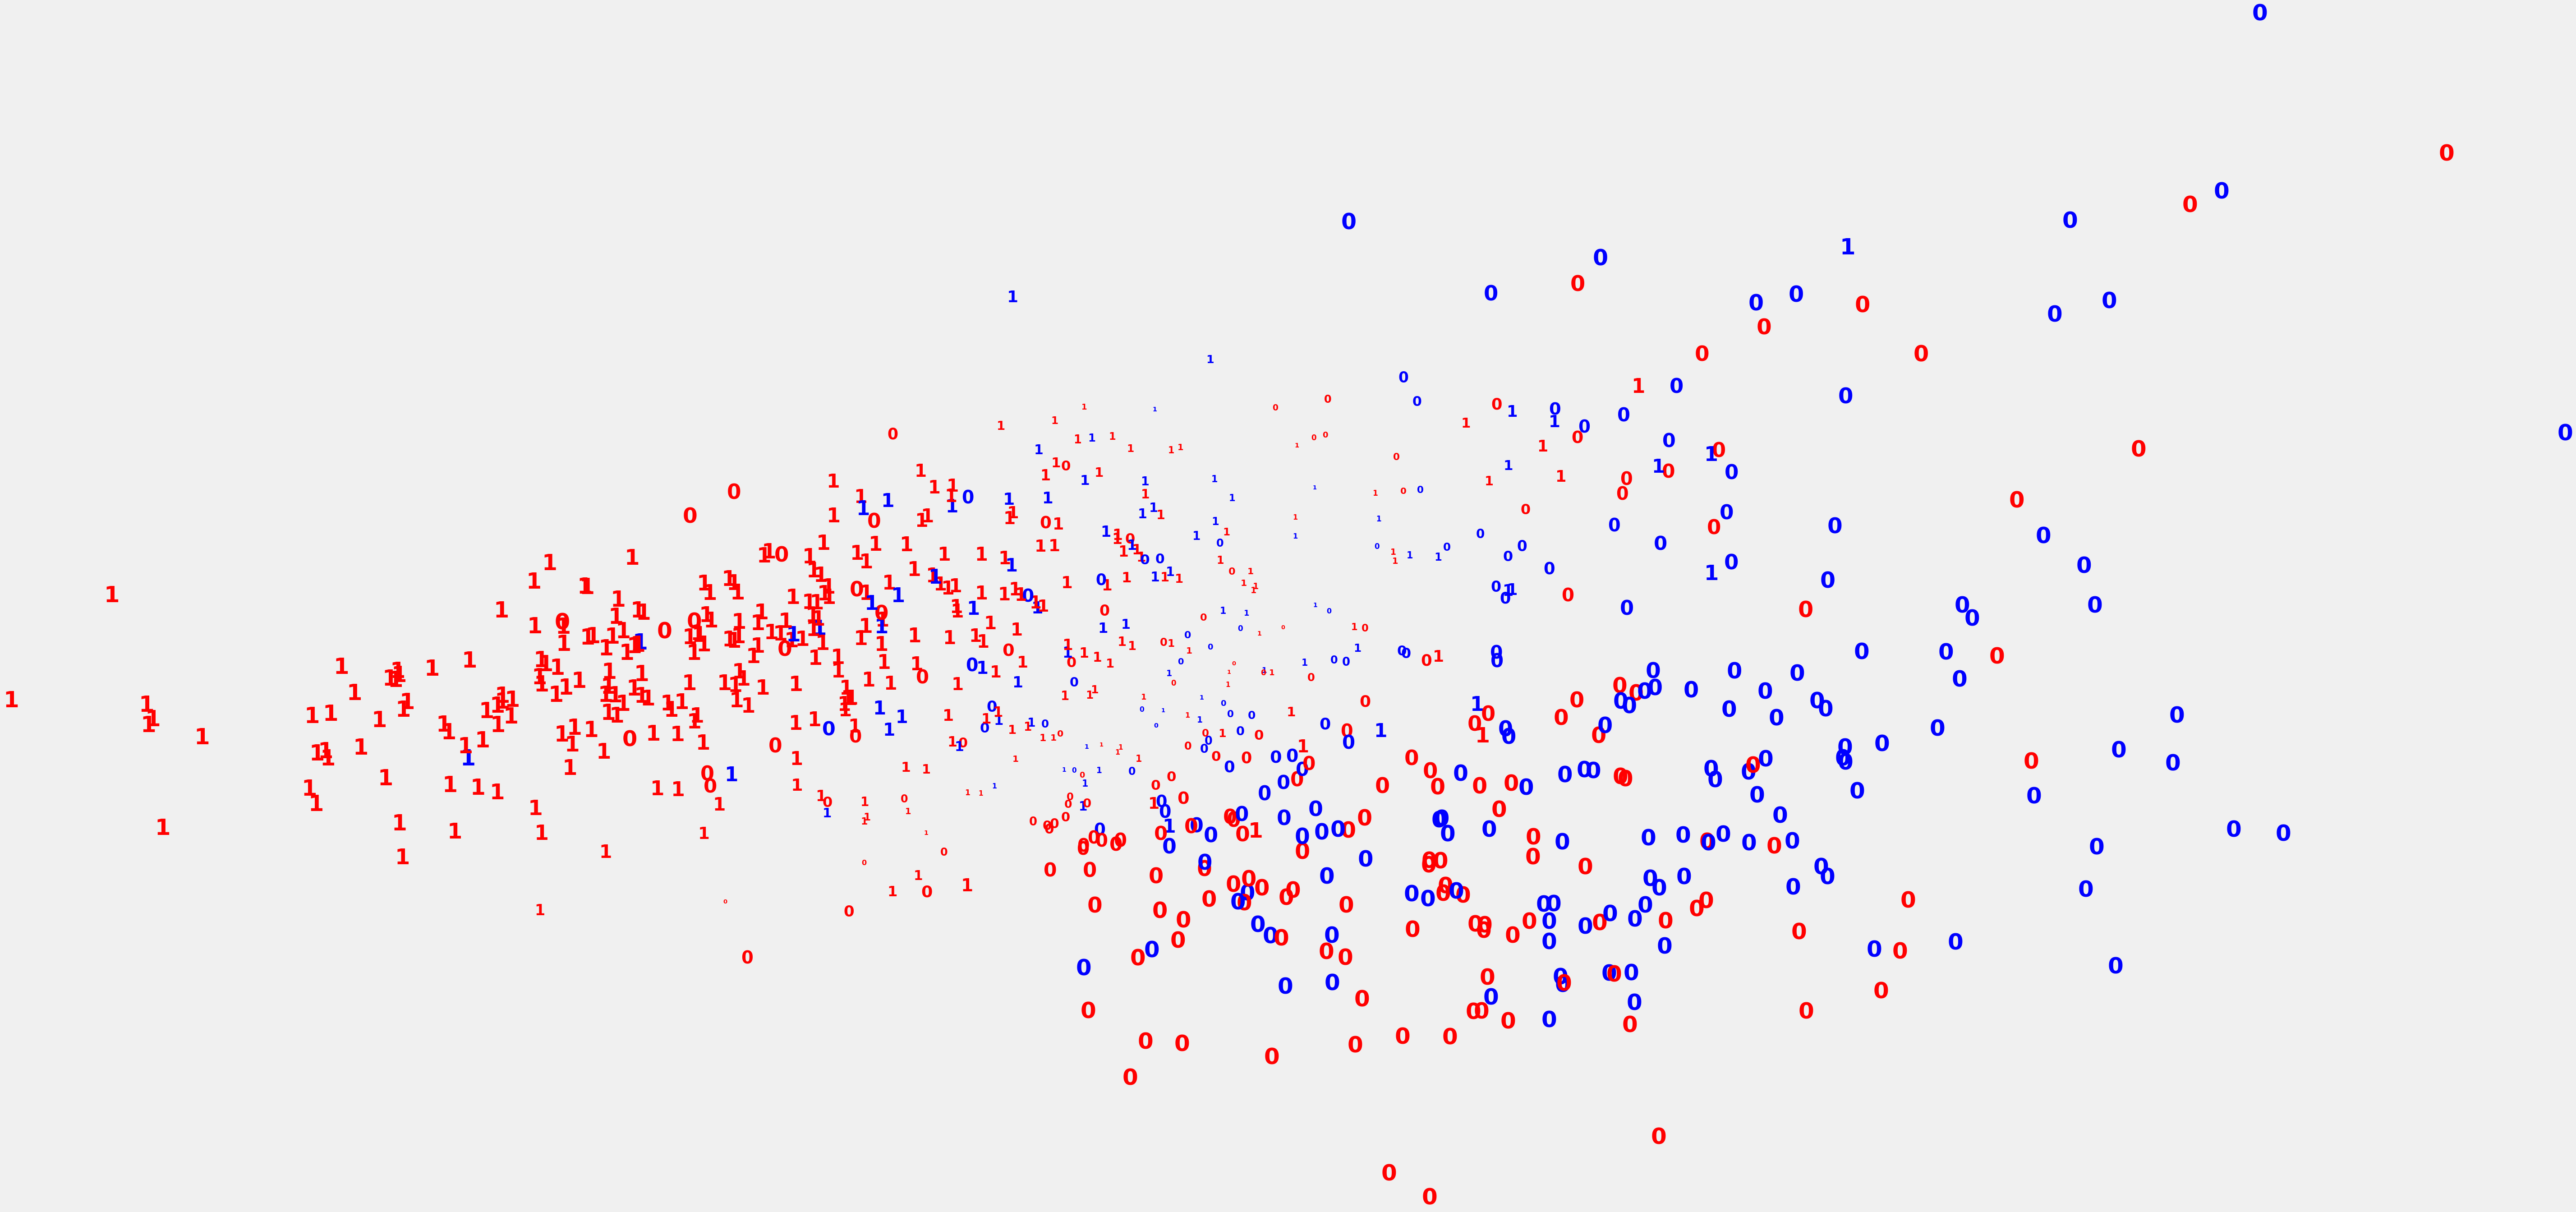

In [ ]:
probs = gmm_cluster.predict_proba(pca)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

This graph looks better, doesn't it?

# t-SNE

Warning! This is a slow working algorithm, it takes longer for respectively larger sets.

In [ ]:
from sklearn.manifold import TSNE
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 12.551874
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.011253
[t-SNE] KL divergence after 300 iterations: 0.646048
t-SNE done! Time elapsed: 2.18756103515625 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# UMAP

In [ ]:
!pip install umap-learn

  Using cached umap_learn-0.5.2-py3-none-any.whl


In [ ]:
import umap.umap_ as umap


In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 11.046360731124878 seconds


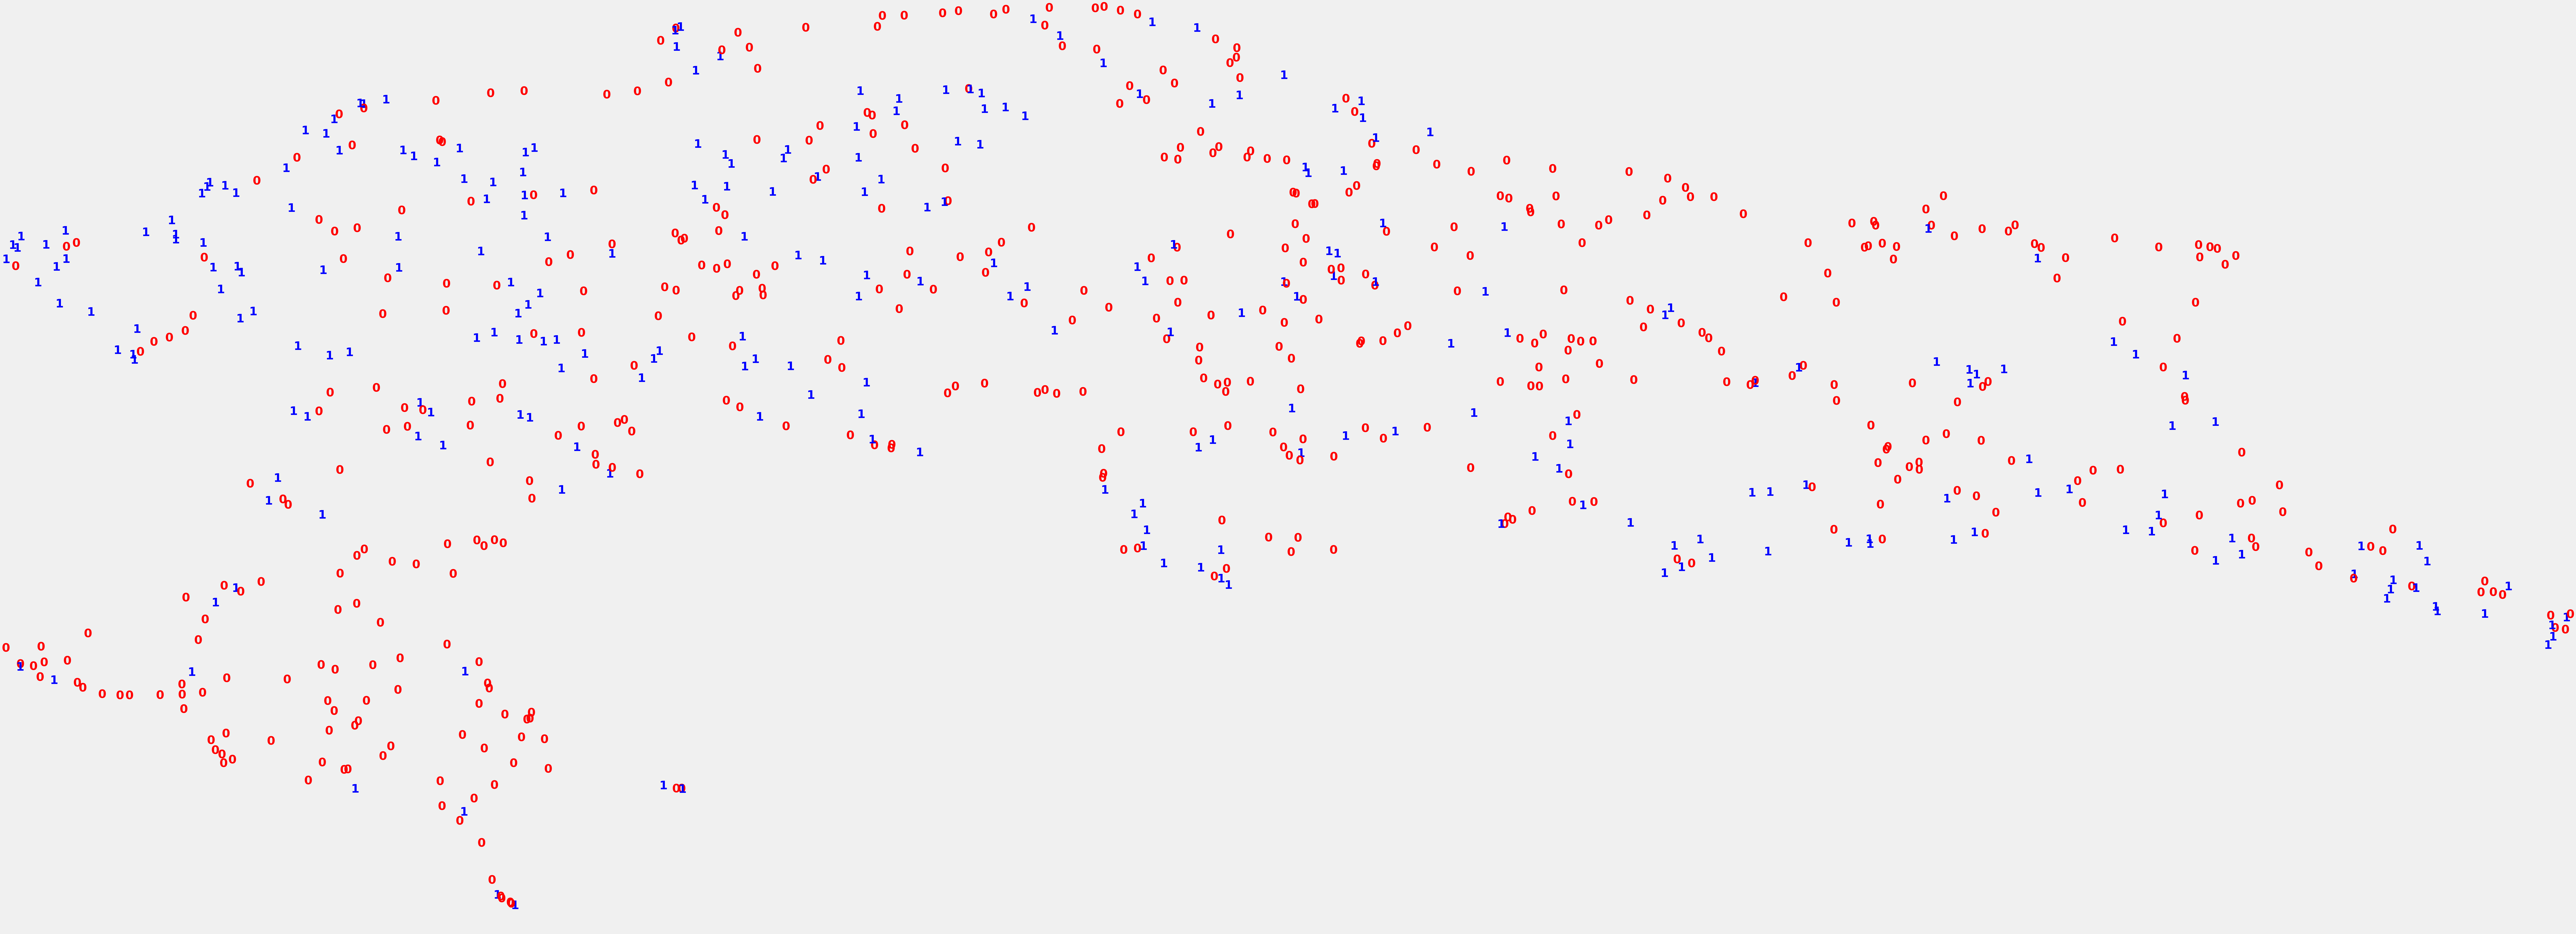

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

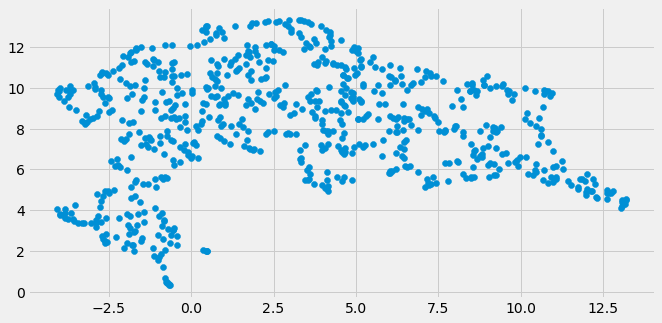

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.show()

**Let us work with Deep Learning Algorihtms now.**

# Deep Learning Methods

# ANN

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
X = diabetes_df.drop('class', axis=1).values.astype(np.float32)
y =  diabetes_df['class'].values.reshape(-1,1).astype(np.float32)
print(X.shape, y.shape)

(768, 8) (768, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shape of train set (X) :", X_train.shape)
print("Shape of train set (y) :", y_train.shape)
print("Shape of test set  (X) :", X_test.shape)
print("Shape of test set  (y) :", y_test.shape)

Shape of train set (X) : (614, 8)
Shape of train set (y) : (614, 1)
Shape of test set  (X) : (154, 8)
Shape of test set  (y) : (154, 1)


We'll use sigmoid function as our activation function, since it restricts the data between 0 and 1.

In [ ]:
from tensorflow.keras.layers import Dense

input_number = X_train.shape[1]
print(input_number)

8


Let us add our hidden layers with powers 2^4, 2^2, and, lastly, 2^0 as the output layer.

In [ ]:
classification_model = Sequential()
classification_model.add(Dense(16, 
                               activation='sigmoid', 
                               input_shape = (input_number,), 
                               name = "Hidden_Layer_1"))

In [ ]:
classification_model.add(Dense(4, 
                               activation='sigmoid', 
                               name = "Hidden_Layer_2"))

In [ ]:
classification_model.add(Dense(1, activation='sigmoid', name = "Output"))

In [ ]:
classification_model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 16)                144       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 4)                 68        
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


We will use binary_crossentropy as the loss function, and accuracy for the performance of the model.

In [ ]:
classification_model.compile(optimizer ='adam',
                             loss='binary_crossentropy', 
                             metrics =['accuracy'])

Now, we'll train our model with 100 epochs.

In [ ]:
classification_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
accuracy_train = classification_model.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = classification_model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.700
Accuracy for test set  : 0.701


The results seem that there is a slight over-fitting, fortunately, we disregard that much of difference in the Deep Learning Algorithms.

In [ ]:
y_pred=classification_model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
# from sklearn.metrics import confusion_matrix
hm = confusion_matrix(y_test, y_pred)
print(hm)

[[91  8]
 [38 17]]


**Let us train our model with another 100 epochs this time.**

In [ ]:
classification_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
accuracy_train = classification_model.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = classification_model.evaluate(X_test, y_test, verbose = 0)[1]

print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.723
Accuracy for test set  : 0.747


Our results got better, and they're pretty good to save.

In [ ]:
y_pred=classification_model.predict(X_test)
y_pred =(y_pred>0.5)

In [ ]:
# from sklearn.metrics import confusion_matrix
hm = confusion_matrix(y_test, y_pred)
print(hm)

[[85 14]
 [25 30]]


This shows our prediction table. We've predicted 85 true positives and 30 true negatives.

# Conclusion

We have small amount of data to consider, so it'll be better if we have more data.

Logistic Regression and ANN worked better than the other models.
For the sake of simplicity, we may choose Logistic Regression to use for our model.

Lastly, I wish everyone a healthy life.